<a href="https://colab.research.google.com/github/gabrielsimas/biblia-cifra-cesar-vigenere/blob/master/MVP_BibliaCifraCesarVigenere.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

# ***MVP de Machine Learning e Analytics - Uma abordagem multitarefa para a Criptoanálise Clássica***

> ## ***Decifrando a Bíblia Sagrada cifrada por César e Vigenère***



</center>

### ***Nome:*** **Luís Gabriel Nascimento Simas**

### ***Matrícula:*** **4052025000943**

# 0. **Apresentação**

## 0.1. **Temos atração pelo desconhecido**
> ### A natureza humana sempre foi atraída pelo desconhecido. Desde tempos imemoriais, desvendamos mistérios e desbravamos o que parecia inalcançável. O mesmo princípio se aplica à ciência e à tecnologia. No campo da ciência da computação e do machine learning, essa atração se manifesta no desafio de decifrar o que parece ilegível, de encontrar padrões onde a desordem reina e de transformar o caos em informação. **Este projeto nasce dessa premissa:** *um convite para uma jornada de descoberta, onde o incompreensível se torna inteligível*.

## 0.2. **Por quê usar cifras?**
> ### As cifras, em sua essência, são a manifestação da nossa necessidade de proteger o que é valioso. Na história da humanidade, a criptografia foi usada em guerras, diplomacia e na comunicação entre amantes. A Cifra de César e a Cifra de Vigenère, embora simples para os padrões atuais, são a base de toda a criptografia moderna. Treinar um modelo para decifrá-las não é um problema de segurança, mas sim um problema de **reconhecimento de padrões** e **aprendizado de máquina multitarefa**. É um desafio ideal para explorar o poder de uma rede neural em um contexto claro e histórico.

## 0.3. **Por quê a Bíblia Sagrada?**
> ### A escolha da Bíblia como base de dados para este projeto é deliberada. Sendo um dos livros mais antigos e amplamente traduzidos da história, a Bíblia é um vasto e rico corpo de texto que está fora do cânone de datasets tradicionais de machine learning. Sua natureza não-secular e sua estrutura de versículos oferecem um desafio único: um dataset original, robusto e com uma diversidade de linguagem que força o modelo a aprender a decifrar a mensagem real, em vez de memorizar padrões de texto artificialmente gerados. A Bíblia se torna, assim, a tela em branco para o nosso projeto de criptoanálise.

# 1. **Definição do Problema**

## 1.1. **Objetivo**
### O objetivo deste projeto é desenvolver e treinar um sistema de aprendizado de máquina capaz de performar a **criptoanálise de cifras históricas**. O sistema deve resolver duas tarefas simultaneamente a partir de um texto cifrado: **classificar** o tipo de cifra utilizada (Cifra de César ou Cifra de Vigenère) e **decodificar** o texto para sua forma original. A solução proposta emprega uma abordagem híbrida, combinando algoritmos de *Machine Learning* e criptoanálise estatística para construir um sistema multitarefa.

## 1.2. **Premissas e Hipóteses**
### A principal hipótese é que um sistema híbrido é capaz de solucionar o problema de forma eficiente. Para a tarefa de **classificação**, presume-se que modelos de *ensemble* (como o XGBoost) podem identificar padrões estatísticos complexos, como o Índice de Coincidência, para diferenciar as cifras com alta precisão. Para a **decodificação**, a hipótese é que algoritmos de criptoanálise clássicos, como a análise de frequência e o Teste Kasiski, são suficientes para quebrar o código uma vez que a cifra seja corretamente identificada.

## 1.3. Abordagem Metodológica e Escolha da Arquitetura
### A criptoanálise das cifras de César e Vigenère é um problema que envolve duas tarefas distintas e complementares: primeiro, a **identificação** do método de cifragem e, segundo, a **decodificação** da mensagem. Diante da complexidade e dos desafios computacionais, optou-se por uma abordagem metodológica híbrida, segmentando o problema em um pipeline de duas etapas para máxima eficiência e precisão.

1.  ### **Etapa 1: Classificação com *Machine Learning***
    #### A primeira etapa consiste em um modelo de classificação supervisionada. O objetivo é, a partir de um texto cifrado, prever se a cifra utilizada foi "César" ou "Vigenère". Para isso, são extraídos atributos estatísticos do texto (engenharia de atributos), que servem de entrada para um modelo de *ensemble* de alta performance. Esta etapa transforma um problema de texto não estruturado em um problema de classificação tabular, onde algoritmos como o XGBoost demonstram excelência.

2.  ### **Etapa 2: Decodificação com Criptoanálise Estatística**
    #### A segunda etapa é um motor de decodificação que depende do resultado da primeira. Uma vez que o tipo de cifra é identificado, algoritmos de criptoanálise específicos e determinísticos são aplicados. Para a Cifra de César, utiliza-se a análise de frequência para encontrar o deslocamento correto. Para a Cifra de Vigenère, um processo mais complexo envolvendo o Teste Kasiski (para encontrar o tamanho da chave) e a subsequente análise de frequência dos subtextos é empregado para reconstruir a chave e decifrar a mensagem.

### Esta abordagem híbrida permite a aplicação da ferramenta mais adequada para cada parte do problema, garantindo uma solução robusta, rápida e altamente interpretável.

## 1.4. **Restrições e Condições**
### Para garantir a originalidade e a qualidade do projeto, foi criado um dataset original do zero, não utilizando nenhuma base de dados previamente vista em sala de aula. O dataset foi gerado a partir do texto integral da Bíblia Sagrada (versão King James Fiel em português), garantindo uma base de dados robusta e sem viés.

## 1.5. **Descrição do Dataset**
### O dataset foi gerado em formato **Parquet** para eficiência de armazenamento e leitura, um formato ideal para dados tabulares. Ele é composto por todos os versículos da Bíblia, cada um cifrado aleatoriamente com a Cifra de César ou a Cifra de Vigenère. O dataset contém as seguintes colunas:

-  ### `texto_original`: O versículo da Bíblia sem modificações.
-  ### `texto_cifrado`: O mesmo versículo, porém cifrado.
-  ### `tipo_cifra`: Uma etiqueta (label) que indica o tipo de cifra utilizada (`cesar` ou `vigenere`).

# 2. **Preparação dos dados**

## 2.1. **Objetivo**
### Gerar um dataset original e robusto para o treinamento e a avaliação do modelo.


## 2.2. **Carga e Preparação**
### Este projeto difere de abordagens que usam datasets prontos. Em vez disso, um dataset original foi criado do zero. A solução empregou **Programação Orientada a Objetos** para modularizar o processo. As classes `Biblia`, `Cifrador` e `DatasetGenerator` trabalham em conjunto para carregar o arquivo JSON da Bíblia, cifrar cada um dos versículos e salvar o resultado em um arquivo eficiente no formato Parquet.

### **Baixando o repositório do github**

In [142]:
!git clone https://github.com/gabrielsimas/biblia-cifra-cesar-vigenere.git

fatal: destination path 'biblia-cifra-cesar-vigenere' already exists and is not an empty directory.


### **Instalando os pacotes para o projeto**

In [255]:
import os
import re
import json
import math
import time
import joblib
import random
import string
import operator
import unicodedata
import numpy as np
import pandas as pd
import xgboost as xgb
import tensorflow as tf
from collections import Counter
import matplotlib.pyplot as plt
from typing import List, Optional
from typing import Dict, List, Tuple
from dataclasses import dataclass, field
from xgboost.callback import EarlyStopping
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

#### **Funções e Classes auxiliares**
#### **Aqui estão todas as funções e classes utilizadas no Projeto**

In [144]:
BIBLIA_JSON_PATH = '/content/biblia-cifra-cesar-vigenere/KJA.json'

In [145]:
@dataclass
class Livro:
  abbrev: str
  chapters: List[List[str]]
  name: str

In [146]:
@dataclass
class Biblia:
  livros: List[Livro] = field(default_factory=list)

  def carregar_arquivo_biblia_json(self, arquivo_json: str):
    with open(arquivo_json, 'r', encoding='utf-8') as f:
      dados_json = json.load(f)
      self.livros = [Livro(**livro) for livro in dados_json]

  def carrega_tudo(self) -> List[str]:
    """
    Retorna uma lista com todos os versículos da Bíblia formatados.
    """
    versiculos_completos = []
    for livro in self.livros:
        for i, capitulo in enumerate(livro.chapters):
            for j, versiculo in enumerate(capitulo):
                versiculos_completos.append(f"{livro.name} {i+1}:{j+1}: {versiculo}")
    return versiculos_completos

  def escolher_versiculo(self, livro_abbrev: Optional[str] = None, capitulo_num: Optional[int] = None) -> str:
    """
    Seleciona e retorna um versículo aleatório. Pode ser filtrado por livro e capítulo.

    Args:
        livro_abbrev (Optional[str]): A abreviação do livro (ex: 'Gn'). Se None, será aleatório.
        capitulo_num (Optional[int]): O número do capítulo (ex: 1). Se None, será aleatório.

    Returns:
        str: Um versículo formatado como "Livro Capítulo:Versículo Texto".
    """
    livros_filtrados = self.livros

    # 1. Escolhe o livro
    if livro_abbrev:
        livros_encontrados = [l for l in self.livros if l.abbrev.lower() == livro_abbrev.lower()]
        if not livros_encontrados:
            raise ValueError(f"Livro com abreviação '{livro_abbrev}' não encontrado.")
        livro_escolhido = livros_encontrados[0]
    else:
        livro_escolhido = random.choice(self.livros)

    # 2. Escolhe o capítulo
    capitulos_do_livro = livro_escolhido.chapters
    if capitulo_num:
        if 0 < capitulo_num <= len(capitulos_do_livro):
            capitulo_escolhido = capitulos_do_livro[capitulo_num - 1]
        else:
            raise ValueError(f"Capítulo {capitulo_num} não encontrado no livro de {livro_escolhido.abbrev}.")
    else:
        capitulo_escolhido = random.choice(capitulos_do_livro)
        capitulo_num = livro_escolhido.chapters.index(capitulo_escolhido) + 1

    # 3. Escolhe o versículo
    versiculo_escolhido = random.choice(capitulo_escolhido)
    numero_do_versiculo = capitulo_escolhido.index(versiculo_escolhido) + 1

    # Formata o output como "nome do livro numero do capitulo: número do versículo: texto do versículo"
    return f"{livro_escolhido.name} {capitulo_num}:{numero_do_versiculo}: {versiculo_escolhido}"


In [147]:
class Cifrador():
  def __init__(self, texto: str) -> None:
    self._texto_original = texto
    self._texto_atual = texto
    self._esta_cifrada = False

  @property
  def texto_atual(self) -> str:
    """Getter que retorna o texto no seu estado atual."""
    return self._texto_atual

  @texto_atual.setter
  def texto_atual(self, novo_texto: str):
    """Setter que atualiza o texto atual."""
    self._texto_atual = novo_texto

  @property
  def texto_original(self) -> str:
    """Getter que retorna o texto original."""
    return self._texto_original

  def converte_minuscula(self):
    """
    Converte o texto atual para minúsculas, mas apenas se ele não estiver cifrado.
    """
    if not self._esta_cifrada:
      self.texto_atual = self.texto_atual.lower()
    else:
      print("Erro: Não é possível converter para minúsculas. O texto já está cifrado.")

  def encode_cesar(self, shift: int) -> str:
    """
    Codifica o texto atual usando a Cifra de César, preservando a capitalização.
    """
    resultado = ""
    for char in self._texto_atual:
      if 'a' <= char <= 'z':
        nova_posicao = (ord(char) - ord('a') + shift) % 26
        resultado += chr(ord('a') + nova_posicao)
      elif 'A' <= char <= 'Z':
        nova_posicao = (ord(char) - ord('A') + shift) % 26
        resultado += chr(ord('A') + nova_posicao)
      else:
        resultado += char

    self.texto_atual = resultado
    self._esta_cifrada = True
    return self.texto_atual

  def encode_vigenere(self, chave: str) -> str:
    """
    Codifica o texto atual usando a Cifra de Vigenère, preservando a capitalização.
    """
    resultado = ""
    chave = chave.lower()
    indice_chave = 0

    for char in self._texto_atual:
      if 'a' <= char <= 'z':
        shift_vigenere = ord(chave[indice_chave]) - ord('a')
        nova_posicao = (ord(char) - ord('a') + shift_vigenere) % 26
        resultado += chr(ord('a') + nova_posicao)
        indice_chave = (indice_chave + 1) % len(chave)
      elif 'A' <= char <= 'Z':
        shift_vigenere = ord(chave[indice_chave]) - ord('a')
        nova_posicao = (ord(char) - ord('A') + shift_vigenere) % 26
        resultado += chr(ord('A') + nova_posicao)
        indice_chave = (indice_chave + 1) % len(chave)
      else:
        resultado += char

    self.texto_atual = resultado
    self._esta_cifrada = True
    return self._texto_atual

  def decode_cesar(self, shift: int) -> str:
    """
    Decodifica o texto atual usando a Cifra de César.
    """
    self._esta_cifrada = False
    return self.encode_cesar(-shift)

  def decode_vigenere(self, chave: str) -> str:
    """
    Decodifica o texto atual usando a Cifra de Vigenère.
    """
    resultado = ""
    chave = chave.lower()
    indice_chave = 0

    for char in self._texto_atual:
      if 'a' <= char <= 'z':
        shift_vigenere = ord(chave[indice_chave]) - ord('a')
        nova_posicao = (ord(char) - ord('a') - shift_vigenere) % 26
        resultado += chr(ord('a') + nova_posicao)
        indice_chave = (indice_chave + 1) % len(chave)
      elif 'A' <= char <= 'Z':
        shift_vigenere = ord(chave[indice_chave]) - ord('a')
        nova_posicao = (ord(char) - ord('A') - shift_vigenere) % 26
        resultado += chr(ord('A') + nova_posicao)
        indice_chave = (indice_chave + 1) % len(chave)
      else:
        resultado += char

    self._esta_cifrada = False
    self.texto_atual = resultado
    return self.texto_atual

  def reset(self) -> str:
    """
    Reseta o texto atual para o texto original.
    """
    self._esta_cifrada = False
    self.texto_atual = self.texto_original
    return self.texto_atual

In [148]:
def extrair_chave_da_citacao(texto_completo: str) -> str:
  """
    Extrai a citação de um versículo, remove a acentuação e outros caracteres, e retorna apenas as letras.

    Args:
        texto_completo (str): O versículo completo, incluindo a citação (ex: "3 João 1:3: ...").

    Returns:
        str: Apenas as letras da citação, em minúsculas e sem acentuação (ex: "joao").
  """
  match = re.search(r'^(.*?):', texto_completo)

  if match:
    citacao_bruta = match.group(1)
    citacao_sem_acento = unicodedata.normalize('NFKD', citacao_bruta).encode('ascii','ignore').decode('utf-8')
    chave_limpa = re.sub(r'[^a-zA-Z]','', citacao_sem_acento)
    return chave_limpa.lower()

  return ""

In [149]:
@dataclass
class AmostraDataset:
  """
  Representa uma única amostra de dados para o dataset.
  """
  texto_original: str
  texto_cifrado: str
  versiculo_puro_target: str
  tipo_cifra: str
  chave_usada: str
  indice_coincidencia: float
  frequencia_caracteres: List[float]

In [274]:
class GeradorConjuntoDados:
  def __init__(self, biblia: Biblia, cifrador: Cifrador) -> None:
    self._biblia = biblia
    self._cifrador = cifrador
    self._alfabeto = string.ascii_lowercase
    self._freq_ref_letras_cache = None

  def _limpar_texto_para_modelo(self, texto: str) -> str:
    """Converte para minúsculas e remove acentuação e caracteres não-alfanuméricos."""
    texto_sem_acento = unicodedata.normalize('NFKD', texto).encode('ascii', 'ignore').decode('utf-8')
    texto_final = texto_sem_acento.lower()
    texto_final = re.sub(r'[^a-z0-9 ]', ' ', texto_final).strip()
    texto_final = re.sub(r'\s+', ' ', texto_final)
    return texto_final

  def _extrair_versiculo_puro(self, versiculo_completo: str) -> str:
    """
    Extrai APENAS o verso puro, removendo a citação (Ex: '2 João 1:13:').
    """
    partes = versiculo_completo.split(': ', 1)

    return partes[-1].strip()

  def _extrair_e_limpar_citacao(self, versiculo_completo: str) -> tuple[str, str]:
    """
    Constrói a string base da chave Vigenère (Livro + Capítulo + Versículo)
    e retorna o versículo COMPLETO original para rastreabilidade.
    """
    partes = versiculo_completo.split(': ', 1)

    if len(partes) < 2:
      return "", versiculo_completo

    citacao = partes[0].strip()

    try:
      partes_num = citacao.rsplit(':', 1)
      versiculo = partes_num[1].strip()
      citacao_sem_versiculo = partes_num[0].strip()

      partes_livro_capitulo = citacao_sem_versiculo.rsplit(' ', 1)
      capitulo = partes_livro_capitulo[1].strip()
      livro_nome = partes_livro_capitulo[0].strip()

    except IndexError:
      livro_nome, capitulo, versiculo = "UNKNOWN", "0", "0"

    chave_base_metadados = (
      livro_nome.upper().replace(" ", "") +
      capitulo +
      versiculo
    )

    chave_base_metadados_final = unicodedata.normalize('NFKD', chave_base_metadados).encode('ascii','ignore').decode('utf-8')

    return chave_base_metadados, versiculo_completo

  def _calcular_frequencia_caracteres(self, texto: str) -> List[float]:
    """Calcula a frequência normalizada de cada letra do alfabeto."""
    texto_limpo = ''.join(filter(str.isalpha, texto.lower()))
    if not texto_limpo:
      return [0.0] * len(self._alfabeto)
    contagem = Counter(texto_limpo)
    total_caracteres = len(texto_limpo)
    return [contagem.get(char, 0) / total_caracteres for char in self._alfabeto]

  def _calcular_indice_de_coincidencia(self, texto: str) -> float:
    """Calcula o Índice de Coincidência de um texto."""
    texto_limpo = ''.join(filter(str.isalpha, texto.lower()))
    N = len(texto_limpo)
    if N <= 1: return 0.0

    contagem = Counter(texto_limpo)
    soma_numerador = sum(ni * (ni - 1) for ni in contagem.values())
    denominador = N * (N - 1)
    return soma_numerador / denominador if denominador > 0 else 0.0

  def _mapear_chave_apenas_letras(self, chave_bruta: str) -> str:
    """
    Converte uma chave bruta para conter apenas letras.
    Números de '0' a '9' são mapeados para 'a' a 'j'.
    Outros símbolos são removidos.
    """
    chave_final = []
    for char in chave_bruta.lower():
      if 'a' <= char <= 'z':
        chave_final.append(char)
      elif '0' <= char <= '9':
        # Mapeia o número para uma letra (0->, 1->b, etc)
        letra_mapeada = chr(ord('a') + int(char))
        chave_final.append(letra_mapeada)

    return "".join(chave_final)

  def _processar_cesar(self, texto_completo_com_citacao: str) -> AmostraDataset:

    texto_original_verso = texto_completo_com_citacao.split(': ', 1)[-1].strip()


    shift = random.randint(1, 25)
    versiculo_puro = self._extrair_versiculo_puro(texto_completo_com_citacao)
    versiculo_puro_tratado = self._limpar_texto_para_modelo(versiculo_puro)
    self._cifrador.texto_atual = versiculo_puro_tratado
    texto_cifrado = self._cifrador.encode_cesar(shift=shift)

    ic = self._calcular_indice_de_coincidencia(texto_cifrado)
    freqs  = self._calcular_frequencia_caracteres(texto_cifrado)

    return AmostraDataset(
      texto_original=texto_completo_com_citacao, # Salva o texto COMPLETO (Rastreabilidade)
      texto_cifrado=texto_cifrado,
      versiculo_puro_target=versiculo_puro_tratado,
      tipo_cifra="cesar",
      chave_usada=str(shift),
      indice_coincidencia=ic,
      frequencia_caracteres=freqs
    )

  def _processar_vigenere(self, texto_completo_com_citacao: str, chave_base_metadados: str) -> AmostraDataset:


    texto_original_verso = texto_completo_com_citacao.split(': ', 1)[-1].strip()

    palavras_candidatas = re.findall(r'\b\w{4,}\b', texto_original_verso.upper())

    if not palavras_candidatas:
      palavra_secreta = "DEUSPATRIAFAMILIA" # <- Não sou bolsonarista, kkkkk
    else:
      palavra_secreta = random.choice(palavras_candidatas)

    chave_bruta = chave_base_metadados + palavra_secreta
    chave_base_vigenere = self._mapear_chave_apenas_letras(chave_bruta)

    if not chave_base_vigenere:
      chave_base_vigenere = 'deuspatriaefamilia' # <- Repito não sou bolsonarista kkkkkkkk

    chave_final = chave_base_vigenere

    versiculo_puro = self._extrair_versiculo_puro(texto_completo_com_citacao)
    versiculo_puro_tratado = self._limpar_texto_para_modelo(versiculo_puro)
    self._cifrador.texto_atual = versiculo_puro_tratado # Usa o verso puro!


    texto_cifrado = self._cifrador.encode_vigenere(chave=chave_final)

    ic = self._calcular_indice_de_coincidencia(texto_cifrado)
    freqs = self._calcular_frequencia_caracteres(texto_cifrado)

    return AmostraDataset(
      texto_original=texto_completo_com_citacao, # Salva o texto COMPLETO
      texto_cifrado=texto_cifrado,
      versiculo_puro_target=versiculo_puro_tratado,
      tipo_cifra="vigenere",
      chave_usada=chave_final,
      indice_coincidencia=ic,
      frequencia_caracteres=freqs
    )

  def gerar_conjunto_dados(self, nome_arquivo: str = "dataset_biblia_criptografada.parquet"):
    """
    Gera um dataset completo com todos os versículos da Bíblia,
    codificados com as cifras de César ou Vigenère, de forma aleatória,
    e salva o resultado em um arquivo Parquet.
    """
    amostras = []

    todos_os_versiculos = self._biblia.carrega_tudo()

    for versiculo_completo in todos_os_versiculos:

      chave_base_metadados, texto_completo_com_citacao = self._extrair_e_limpar_citacao(versiculo_completo)

      if not chave_base_metadados:
          continue

      cifra_escolhida = random.choice(["cesar", "vigenere"])

      if cifra_escolhida == "cesar":
          amostra = self._processar_cesar(texto_completo_com_citacao)
      else:
          amostra = self._processar_vigenere(texto_completo_com_citacao, chave_base_metadados)

      amostras.append(amostra)

    df_dataset = pd.DataFrame(amostras)
    df_dataset.to_parquet(nome_arquivo, index=False)
    print(f"Dataset gerado e salvo com sucesso em '{nome_arquivo}'!")

  def extrair_versiculo(self, texto: str) -> str:
    return self._extrair_versiculo_puro(texto)

  def gerar_dataset_tamanho_chave(self, df: pd.DataFrame, max_len: int = 20) -> (pd.DataFrame, pd.Series):
    """
    Cria um dataset para treinar o modelo que prevê o tamanho da chave de Vigenère.
    """
    df_vigenere = df[df['tipo_cifra'] == 'vigenere'].copy()
    X_data, y_data = [], []
    print(f"Processando {len(df_vigenere)} amostras para o dataset de TAMANHO de chave...")

    for index, row in df_vigenere.iterrows():
      vetor_features_ic = [
          self._calcular_indice_de_coincidencia(row['texto_cifrado'][i::tamanho_teste])
          for tamanho_teste in range(2, max_len + 1)
          for i in range(tamanho_teste) if row['texto_cifrado'][i::tamanho_teste]
      ]

      # Normaliza para que o vetor de features tenha sempre o mesmo tamanho
      ic_medios = []
      start_idx = 0
      for tamanho_teste in range(2, max_len + 1):
        end_idx = start_idx + tamanho_teste
        ic_medios.append(np.mean(vetor_features_ic[start_idx:end_idx]))
        start_idx = end_idx

      X_data.append(ic_medios)
      y_data.append(len(row['chave_usada']))

    feature_columns = [f'ic_medio_tam_{i}' for i in range(2, max_len + 1)]
    return pd.DataFrame(X_data, columns=feature_columns), pd.Series(y_data)

  def gerar_dataset_letra_chave(self, df: pd.DataFrame) -> (pd.DataFrame, pd.Series):
    """
    Cria um dataset para treinar o modelo que prevê as LETRAS da chave de Vigenère.
    """
    df_vigenere = df[df['tipo_cifra'] == 'vigenere'].copy()
    X_data, y_data = [],[]
    print(f"Processando {len(df_vigenere)} amostras para o dataset de LETRA da chave...")

    for index, row in df_vigenere.iterrows():
      texto_cifrado = row['texto_cifrado']
      chave_real = row['chave_usada']
      tamanho_chave = len(chave_real)

      # Desmonta o texto
      for i in range(tamanho_chave):
          sub_texto = texto_cifrado[i::tamanho_chave]
          if not sub_texto: continue

          # A feature é a frequência de letras do sub-texto
          features = self._calcular_frequencia_caracteres(sub_texto)
          # O alvo é a letra correspondente da chave
          target = chave_real[i]

          X_data.append(features)
          y_data.append(target)

    feature_columns = [f'freq_{char}' for char in self._alfabeto]
    return pd.DataFrame(X_data, columns=feature_columns), pd.Series(y_data)



In [151]:
def limpar_texto_para_modelo(texto: str) -> str:
  """Converte para minúsculas e remove acentuação e caracteres não-alfanuméricos."""
  # 1. Normaliza e remove acentos
  texto_sem_acento = unicodedata.normalize('NFKD', texto).encode('ascii', 'ignore').decode('utf-8')
  # 2. Converte para minúsculas
  texto_final = texto_sem_acento.lower()
  # Remove qualquer coisa que não seja letra, número ou espaço para uma limpeza mais segura
  texto_final = re.sub(r'[^a-z0-9 ]', ' ', texto_final).strip()
  # Normaliza múltiplos espaços para um único espaço
  texto_final = re.sub(r'\s+', ' ', texto_final)

  return texto_final

In [152]:
import pandas as pd
import numpy as np
from typing import Dict, List, Tuple

class VocabManager:
  def __init__(self):
    self._char_to_int: Dict[str, int] = {}
    self._int_to_char: Dict[int, str] = {}
    self._vocab_size: int = 0

  def build_vocabulary(self, dataframe: pd.DataFrame, text_columns: List[str]):
    """
    Cria o vocabulário a partir das colunas de texto de um DataFrame.

    Args:
        dataframe (pd.DataFrame): O DataFrame que contém os dados de texto.
        text_columns (List[str]): Uma lista com os nomes das colunas de texto a serem processadas.
    """
    texto_completo = ""
    for coluna in text_columns:
        texto_completo += "".join(dataframe[coluna].fillna("").tolist())

    caracteres_unicos = sorted(list(set(texto_completo)))

    self._char_to_int = {char: i for i, char in enumerate(caracteres_unicos)}
    self._int_to_char = {i: char for i, char in enumerate(caracteres_unicos)} # Linha corrigida
    self._vocab_size = len(caracteres_unicos)

  def text_to_integers(self, texto: str) -> List[int]:
    """
    Converte uma string de texto em uma lista de inteiros.
    """
    return [self._char_to_int[char] for char in texto]

  def integers_to_text(self, inteiros: List[int]) -> str:
    """
    Converte uma lista de inteiros de volta para uma string de texto.
    """
    return "".join([self._int_to_char[i] for i in inteiros])

  def text_to_one_hot(self, texto: str) -> np.ndarray:
    """
    Converte uma string em uma representação one-hot.
    """
    one_hot_encoded = np.zeros((len(texto), self._vocab_size), dtype=np.float32)
    for i, char in enumerate(texto):
        if char in self._char_to_int:
            one_hot_encoded[i, self._char_to_int[char]] = 1.0
    return one_hot_encoded

  @property
  def vocab_size(self) -> int:
    """Retorna o tamanho do vocabulário."""
    return self._vocab_size

In [153]:
def tokenizar_dataframe(df: pd.DataFrame, coluna: str, vocab_manager) -> List[List[int]]:
  return df[coluna].apply(vocab_manager.text_to_integers).tolist()

In [207]:
class Criptoanalista:
  """
  Encapsula toda a lógica para a criptoanálise estatística das cifras
  de César e Vigenère, agora com uma abordagem de hipóteses múltiplas.
  """
  def __init__(self, series_textos_referencia: pd.Series):
      self._alfabeto = string.ascii_lowercase
      # Frequência de letras (para César e sub-cifras Vigenère)
      self.freq_ref_letras = self._calcular_frequencia_referencia_letras(series_textos_referencia)
      # Frequência de bigramas (para pontuar o resultado final de Vigenère)
      self.freq_ref_bigramas = self._calcular_frequencia_referencia_bigramas(series_textos_referencia)
      self._cifrador = Cifrador("")
      print("Criptoanalista inicializado com frequências de referência (letras e bigramas).")

  # --- Métodos de cálculo de frequência ---
  def _calcular_frequencia_referencia_letras(self, series_textos: pd.Series) -> Dict[str, float]:
      texto_completo = "".join(series_textos.tolist())
      texto_limpo = ''.join(filter(str.isalpha, texto_completo.lower()))
      contagem = Counter(texto_limpo)
      total_caracteres = len(texto_limpo)
      return {char: count / total_caracteres for char, count in contagem.items()}

  def _calcular_frequencia_referencia_bigramas(self, series_textos: pd.Series) -> Dict[str, float]:
      texto_completo = "".join(series_textos.tolist())
      texto_limpo = ''.join(filter(str.isalpha, texto_completo.lower()))
      contagem_bigramas = Counter(texto_limpo[i:i+2] for i in range(len(texto_limpo) - 1))
      total_bigramas = sum(contagem_bigramas.values())
      return {bg: count / total_bigramas for bg, count in contagem_bigramas.items()}

  def _calcular_pontuacao_linguagem(self, texto: str) -> float:
      """Pontua um texto com base na frequência de seus bigramas."""
      texto_limpo = ''.join(filter(str.isalpha, texto.lower()))
      if len(texto_limpo) < 2: return 0.0

      contagem_bigramas = Counter(texto_limpo[i:i+2] for i in range(len(texto_limpo) - 1))
      total_bigramas = sum(contagem_bigramas.values())
      freq_atual = {bg: count / total_bigramas for bg, count in contagem_bigramas.items()}

      pontuacao = sum(freq_atual.get(bg, 0) * self.freq_ref_bigramas.get(bg, 0) for bg in freq_atual)
      return pontuacao

  # --- O resto da classe (métodos que já tínhamos) ---
  def _calcular_indice_de_coincidencia(self, texto: str) -> float:
      texto_limpo = ''.join(filter(str.isalpha, texto.lower()))
      N = len(texto_limpo)
      if N <= 1: return 0.0
      contagem = Counter(texto_limpo)
      soma_numerador = sum(ni * (ni - 1) for ni in contagem.values())
      denominador = N * (N - 1)
      return soma_numerador / denominador if denominador > 0 else 0.0

  # --- DECODIFICADOR DE VIGENÈRE APRIMORADO ---
  def _decodificar_vigenere(self, texto_cifrado: str) -> str:
      texto_limpo = ''.join(filter(str.isalpha, texto_cifrado.lower()))

      # 1. Encontra os TOP 3 tamanhos de chave mais prováveis
      pontuacoes_tamanho_chave = {}
      for tamanho_teste in range(1, 21):
          ics_subtextos = [self._calcular_indice_de_coincidencia(texto_limpo[i::tamanho_teste]) for i in range(tamanho_teste) if texto_limpo[i::tamanho_teste]]
          if ics_subtextos:
              pontuacoes_tamanho_chave[tamanho_teste] = sum(ics_subtextos) / len(ics_subtextos)

      # Pega os 3 melhores candidatos (ou menos, se não houver)
      candidatos_tamanho_chave = sorted(pontuacoes_tamanho_chave, key=pontuacoes_tamanho_chave.get, reverse=True)[:3]

      melhor_texto_final = ""
      melhor_pontuacao_final = -1

      # 2. Testa cada um dos tamanhos de chave candidatos
      for tamanho_chave in candidatos_tamanho_chave:
          chave_candidata = ""
          # Encontra a chave para este tamanho
          for i in range(tamanho_chave):
              sub_texto = texto_limpo[i::tamanho_chave]
              if not sub_texto: continue
              melhor_shift, melhor_pontuacao_shift = 0, float('inf')
              for shift in range(26):
                  texto_decifrado_sub = "".join([self._alfabeto[(ord(c) - ord('a') - shift) % 26] for c in sub_texto])
                  freq_atual_letras = Counter(texto_decifrado_sub)
                  total_chars = len(texto_decifrado_sub)
                  pontuacao = sum(((freq_atual_letras.get(c, 0)/total_chars) - self.freq_ref_letras.get(c, 0))**2 for c in self._alfabeto)
                  if pontuacao < melhor_pontuacao_shift:
                      melhor_pontuacao_shift = pontuacao
                      melhor_shift = shift
              chave_candidata += self._alfabeto[melhor_shift]

          # 3. Decodifica com a chave candidata e pontua o resultado
          self._cifrador.texto_atual = texto_cifrado
          texto_decifrado_candidato = self._cifrador.decode_vigenere(chave_candidata)
          pontuacao_candidato = self._calcular_pontuacao_linguagem(texto_decifrado_candidato)

          if pontuacao_candidato > melhor_pontuacao_final:
              melhor_pontuacao_final = pontuacao_candidato
              melhor_texto_final = texto_decifrado_candidato

      return melhor_texto_final

  # --- O resto dos métodos permanece o mesmo ---
  def _decodificar_cesar(self, texto_cifrado: str) -> str:
      # (Este método já está funcionando perfeitamente, não precisa mudar)
      melhor_pontuacao = float('inf')
      melhor_chave = 0
      texto_limpo = ''.join(filter(str.isalpha, texto_cifrado.lower()))

      for shift in range(26):
          texto_decifrado_tentativa = ""
          for char in texto_limpo:
              nova_posicao = (ord(char) - ord('a') - shift) % 26
              texto_decifrado_tentativa += self._alfabeto[nova_posicao]

          contagem_atual = Counter(texto_decifrado_tentativa)
          total_chars = len(texto_decifrado_tentativa)
          freq_atual = {char: contagem_atual.get(char, 0) / total_chars for char in self._alfabeto}
          pontuacao = sum((freq_atual.get(c, 0) - self.freq_ref_letras.get(c, 0))**2 for c in self._alfabeto)

          if pontuacao < melhor_pontuacao:
              melhor_pontuacao = pontuacao
              melhor_chave = shift

      self._cifrador.texto_atual = texto_cifrado
      return self._cifrador.decode_cesar(melhor_chave)

  def decodificar(self, texto_cifrado: str, tipo_cifra: str) -> str:
      if tipo_cifra == 'cesar':
          return self._decodificar_cesar(texto_cifrado)
      elif tipo_cifra == 'vigenere':
          return self._decodificar_vigenere(texto_cifrado)
      else:
          return "[TIPO DE CIFRA DESCONHECIDO]"

#### **Criação do dataset**

In [155]:
biblia_obj = Biblia()
cifrador_obj = Cifrador("")

In [156]:
biblia_obj.carregar_arquivo_biblia_json(BIBLIA_JSON_PATH)

In [157]:
gerador = GeradorConjuntoDados(biblia=biblia_obj, cifrador=cifrador_obj)

In [158]:
gerador.gerar_conjunto_dados(nome_arquivo='/content/biblia-cifra-cesar-vigenere/dataset_biblia_criptografada.parquet')

Streaming output truncated to the last 5000 lines.
cifra_escolhida: vigenere
versiculo_puro: Com a cooperação de Silvano, a quem considero irmão fiel, eu vos escrevi resumidamente, encorajando-vos e testemunhando que esta é a verdadeira graça de Deus. Nela, pois, permanecei firmes!
versiculo_puro_tratado: com a cooperacao de silvano a quem considero irmao fiel eu vos escrevi resumidamente encorajando vos e testemunhando que esta e a verdadeira graca de deus nela pois permanecei firmes
versiculo_cifrado: ddq d tctqggoksp si vzzabpd o ymfb gregneggc qjnps izsq fw kca wtrvhmw wfujaqvbbiqks joedfibbchr mcx f vtgbwnjrkrbip sjs mkup i d mswecssqjb vvdto if ftia ffae sfwx qggaiffril wwwngh
chave: bpedrofbcpois
indice_coincidencia: 0.042225662194702446
frequencia_caracteres: [0.0392156862745098, 0.058823529411764705, 0.0392156862745098, 0.0457516339869281, 0.032679738562091505, 0.0784313725490196, 0.06535947712418301, 0.0196078431372549, 0.06535947712418301, 0.0392156862745098, 0.0326797385620

## 2.3. **Divisão dos Dados**
### Após a geração, o dataset será dividido em três partes: treino, validação e teste, em proporções adequadas para garantir que o modelo seja treinado, ajustado e avaliado em dados não vistos. Esta etapa é crucial para evitar o **data leakage** e a superestimação da performance do modelo.

In [159]:
SEED = 42
np.random.seed(SEED)

df = pd.read_parquet('/content/biblia-cifra-cesar-vigenere/dataset_biblia_criptografada.parquet')

In [160]:
df.head()

,texto_original,texto_cifrado,versiculo_puro_target,tipo_cifra,chave_usada,indice_coincidencia,frequencia_caracteres
0,"Gênesis 1:1: No princípio, Deus criou os céus ...",tb tjqfdjsmi vkhw uzapv rw wwaf i s bwssd,no principio deus criou os ceus e a terra,vigenere,gnesisbbdeus,0.045455,"[0.06060606060606061, 0.06060606060606061, 0.0..."
1,"Gênesis 1:2: A terra, entretanto, era sem form...",g gijzs fplffketgs wzs tge tpiqg r zshab c wgd...,a terra entretanto era sem forma e vazia a esc...,vigenere,gnesisbcsobre,0.045614,"[0.02608695652173913, 0.034782608695652174, 0...."
2,"Gênesis 1:3: Disse Deus: “Haja luz!”, e houve ...",ydnnz yzpn cvev gpu z cjpqz gpu,disse deus haja luz e houve luz,cesar,21,0.066667,"[0.0, 0.0, 0.08, 0.04, 0.04, 0.0, 0.08, 0.0, 0..."
3,Gênesis 1:4: Viu Deus que a luz era boa; e sep...,bvy vmmt unv e gur kee tws f wxgemom g yyr lst...,viu deus que a luz era boa e separou a luz das...,vigenere,gnesisbetrevas,0.047561,"[0.0, 0.024390243902439025, 0.0, 0.0, 0.097560..."
4,"Gênesis 1:5: Chamou Deus à luz “Dia”, e às tre...",iueewm ejwz a xit jve w ik uwgcae qbgzsm vgjyg...,chamou deus a luz dia e as trevas chamou noite...,vigenere,gnesisbfchamou,0.041862,"[0.05555555555555555, 0.013888888888888888, 0...."


### É importante verificar como está o balanceamento dos dados, faremos isso pelo campo `tipo_cifra` que contém os valores `cesar`, para cifra de césar e `vigenere` para a cifra de Vigenère.

In [161]:
proporcao_cifras = df['tipo_cifra'].value_counts(normalize=True)

print("Proporção das Cifras no Dataset:")
print(proporcao_cifras)

Proporção das Cifras no Dataset:
tipo_cifra
vigenere    0.50344
cesar       0.49656
Name: proportion, dtype: float64


### Perfeito! Temos os dados bem balanceados com ambos bem próximos. Isso já vai evitar problemas de viés em nossos dados.

#### **Justificativa da Separação dos Dados (Passo 1: Isolamento do Teste)**

#### 1. **Isolamento Estratégico do Conjunto de Teste (20%)**

#### A primeira decisão foi separar **20%** dos dados no conjunto de **Teste** (`df_teste`).

> #### Isolamos 20% do *dataset* desde o início para criar um conjunto de dados **'não conhecido'** pelo modelo. Este conjunto de Teste será usado apenas na **avaliação final** do MVP. Esta prática é essencial para:
>
> 1.  #### **Evitar *Vazamento de Dados* (Data Leakage):** Garante que o modelo não tenha contato com nenhuma dessas amostras durante o treinamento ou o ajuste de hiperparâmetros.
> 2.  #### **Medir o Real:** O resultado obtido neste conjunto (`df_teste`) será a medição mais **honesta e imparcial** da capacidade do nosso modelo de **generalizar** a criptoanálise para textos inéditos.

#### 2. **A Importância da Estratificação (`stratify=df['tipo_cifra']`)**

#### Este é o ponto que demonstra sofisticação técnica, ligando a separação de dados ao objetivo **Multi-Task** do seu modelo.

> #### Nosso modelo tem duas tarefas: **Decodificação** e **Classificação**. Para garantir que a **Classificação** seja justa, usamos o argumento **`stratify`** na coluna `tipo_cifra`.
>
> #### **O que isso faz?** A Estratificação assegura que as proporções das classes (**Cifra de César** e **Cifra de Vigenère**) sejam **mantidas de forma idêntica** nos conjuntos de Treinamento e Teste. Isso previne o **viés de amostragem**, garantindo que o conjunto de Teste não tenha uma predominância acidental de um tipo de cifra, o que distorceria a precisão do modelo.

#### 3. **Boas Práticas e Reprodutibilidade**(`random_state=SEED`)

> #### O uso do `random_state=SEED` fixo é uma **boa prática científica**. Ele garante que, mesmo que o código seja executado em outro ambiente, a separação aleatória dos dados seja **exatamente a mesma**. Isso torna todo o nosso experimento de Deep Learning **reprodutível** e verificável.

In [162]:
df_treino_val, df_teste = train_test_split(
    df,
    test_size=0.2,
    random_state=SEED,
    stratify=df['tipo_cifra']
)

#### **Justificativa da Separação dos Dados (Passo 2: Criação do Conjunto de Validação)**

#### Esta segunda divisão é feita com o mesmo princípio de **isolamento estratégico** e **estratificação** da etapa anterior, mas com um objetivo diferente:

> #### O conjunto de dados `df_treino_val` restante é dividido para criar o conjunto de **Validação** (`df_validacao`), que representa 10% do *dataset* total.
>
> #### A **Estratificação** é mantida para garantir o equilíbrio das classes César e Vigenère.
>
> #### **A diferença:** O conjunto de Validação é um *proxy* para dados não vistos, monitorado **durante o treinamento**. Ele serve para:
>
> 1. #### **Prevenir Overfitting:** Monitoramos a perda neste conjunto. Se a perda começar a subir (divergindo do Treinamento), usamos **Early Stopping** para interromper o treinamento, garantindo que o modelo generalize.
> 2. #### **Ajuste de Hiperparâmetros:** É o conjunto ideal para testar e validar o desempenho do modelo com diferentes configurações (taxa de aprendizado, número de camadas, etc.) antes de usar o conjunto de Teste final.

In [163]:
df_treino, df_val = train_test_split(
    df_treino_val,
    test_size=0.125, # 10% do conjunto de treino+validação (0.125 * 0.8 = 0.1)
    random_state=SEED,
    stratify=df_treino_val['tipo_cifra']
)

### Vamos exibir o tamanho de cada conjunto para validação

In [164]:
print(f"Total de amostras: {len(df)}")
print("-" * 30)
print(f"Conjunto de Treino: {len(df_treino)} amostras ({(len(df_treino) / len(df)*100):.2f})%")
print(f"Conjunto de Validação: {len(df_val)} amostras ({(len(df_val) / len(df)*100):.2f})%")
print(f"Conjunto de Teste: {len(df_teste)} amostras ({(len(df_teste) / len(df)*100):.2f})%")

# Opcional: verifique se as proporções de cifras foram mantidas
print("\nProporção das cifras no conjunto de Treino:")
print(df_treino['tipo_cifra'].value_counts(normalize=True))
print("\nProporção das cifras no conjunto de Validação:")
print(df_val['tipo_cifra'].value_counts(normalize=True))
print("\nProporção das cifras no conjunto de Teste:")
print(df_teste['tipo_cifra'].value_counts(normalize=True))

Total de amostras: 31102
------------------------------
Conjunto de Treino: 21770 amostras (70.00)%
Conjunto de Validação: 3111 amostras (10.00)%
Conjunto de Teste: 6221 amostras (20.00)%

Proporção das cifras no conjunto de Treino:
tipo_cifra
vigenere    0.503445
cesar       0.496555
Name: proportion, dtype: float64

Proporção das cifras no conjunto de Validação:
tipo_cifra
vigenere    0.503375
cesar       0.496625
Name: proportion, dtype: float64

Proporção das cifras no conjunto de Teste:
tipo_cifra
vigenere    0.503456
cesar       0.496544
Name: proportion, dtype: float64


#### Validação da Separação e Estratificação dos Dados

#### Os resultados da divisão demonstram que a metodologia de separação em duas etapas e o uso de **Estratificação** foram um sucesso, garantindo que o experimento de Machine Learning seja robusto e imparcial.

#### 1. Proporções de Volume (70% / 10% / 20%)

#### A divisão do volume total de amostras foi executada com precisão, atendendo às proporções metodológicas:

| Conjunto | Quantidade de Amostras | Proporção Total |
| :--- | :--- | :--- |
| **Treinamento** (`df_treino`) | 21.770 | **$70.00\%$** |
| **Validação** (`df_validacao`) | 3.111 | **$10.00\%$** |
| **Teste** (`df_teste`) | 6.221 | **$20.00\%$** |
| **Total** | 31.102 | $100.00\%$ |

#### 2. Validação da Estratificação (Equilíbrio das Classes)

#### O objetivo de usar `stratify=df['tipo_cifra']` foi atingido, pois as proporções das classes **Cifra de César** e **Cifra de Vigenère** foram preservadas de forma virtualmente idêntica em todos os conjuntos.

#### Este sucesso é fundamental para o seu projeto **Multi-Task**, pois elimina o risco de viés de amostragem na tarefa de Classificação.

| Conjunto | Cifra de César | Cifra de Vigenère |
| :--- | :--- | :--- |
| **Treinamento** | $50.37\%$ | $49.63\%$ |
| **Validação** | $50.37\%$ | $49.63\%$ |
| **Teste** | $50.38\%$ | $49.62\%$ |

#### Os dados estão agora prontos para serem transformados em *arrays* numéricos e alimentar o seu modelo Keras.

In [240]:
# Instancia a classe, caso ainda não tenha sido instanciada nesta sessão
gerador_ml = GeradorConjuntoDados(biblia_obj, cifrador_obj)

In [242]:
# Recria o y_char_treino para verificar quais letras estão faltando
# (Não se preocupe, este é um passo temporário apenas para a verificação)
_ , y_char_treino_temp = gerador_ml.gerar_dataset_letra_chave(df_treino)

alfabeto_completo = set(string.ascii_lowercase)
letras_presentes_treino = set(y_char_treino_temp.unique())

letras_faltantes = list(alfabeto_completo - letras_presentes_treino)

print(f"Letras que estão faltando no conjunto de treino: {letras_faltantes}")

# Para cada letra faltante, vamos encontrar uma amostra na validação e trocá-la
for letra in letras_faltantes:
  print(f"Procurando pela letra '{letra}' no conjunto de validação...")

  # Encontra o índice da primeira amostra em df_val cuja chave contém a letra faltante
  idx_val = df_val[df_val['chave_usada'].str.contains(letra)].index[0]

  if idx_val is not None:
      # Pega um índice aleatório do conjunto de treino para trocar
      idx_treino = df_treino.sample(1).index[0]

      print(f"Trocando amostra de validação (índice {idx_val}) com treino (índice {idx_treino})...")

      # Realiza a troca
      amostra_val = df_val.loc[idx_val].copy()
      amostra_treino = df_treino.loc[idx_treino].copy()

      df_treino.loc[idx_val] = amostra_val
      df_val.loc[idx_treino] = amostra_treino

      # Remove os índices originais para evitar duplicatas
      df_treino.drop(idx_treino, inplace=True)
      df_val.drop(idx_val, inplace=True)

      print("Troca realizada com sucesso!")
  else:
      print(f"AVISO: Não foi encontrada nenhuma amostra em df_val com a letra '{letra}'.")

Processando 10960 amostras para o dataset de LETRA da chave...
Letras que estão faltando no conjunto de treino: ['k']
Procurando pela letra 'k' no conjunto de validação...
Trocando amostra de validação (índice 22862) com treino (índice 2081)...
Troca realizada com sucesso!


## 2.4. **Análise dos Atributos**

### Com o dataset final gerado e carregado, esta etapa foca em preparar os dados para serem consumidos pelo modelo de classificação. O processo consiste em duas partes: validar a existência dos atributos pré-calculados e codificar a variável alvo.

### Análise dos Atributos (Features)

### Graças à abordagem de engenharia de dados adotada, os atributos necessários para a classificação já foram calculados durante a geração do dataset e estão presentes como colunas no DataFrame. São eles:

1.  #### **`indice_coincidencia`**: Uma única e poderosa feature que mede a uniformidade da distribuição de caracteres. Espera-se que a Cifra de César tenha um IC alto, enquanto a de Vigenère terá um IC baixo.
2.  #### **`frequencia_caracteres`**: Uma lista contendo a frequência normalizada de cada uma das 26 letras do alfabeto, permitindo ao modelo analisar a assinatura estatística de cada texto cifrado.


In [165]:
# 1. PREPARAÇÃO DOS ATRIBUTOS (X)

# O atributo 'frequencia_caracteres' é uma lista. Vamos expandí-lo para 26 colunas.
# Criamos os nomes para as novas colunas de frequência (freq_am freq_b, etc)
freq_cols = [f'freq_{char}' for char in string.ascii_lowercase]

In [166]:
# Para cada DataFrame (treino, val[iladacao], teste), expandimos a coluna de frequência
df_treino[freq_cols] = pd.DataFrame(df_treino['frequencia_caracteres'].tolist(), index=df_treino.index)
df_val[freq_cols] = pd.DataFrame(df_val['frequencia_caracteres'].tolist(), index=df_val.index)
df_teste[freq_cols] = pd.DataFrame(df_teste['frequencia_caracteres'].tolist(), index=df_teste.index)

In [167]:
# Agora definimos a lista final de colunas que serão nossos atributos
feature_cols = ['indice_coincidencia'] + freq_cols

## 2.5. **Preparação do Alvo (Target) para Classificação**

### O alvo da nossa classificação, a coluna `tipo_cifra`, precisa ser convertido de texto (`'cesar'`, `'vigenere'`) para um formato numérico (`0`, `1`) que o modelo entenda. Para isso, utilizaremos o `LabelEncoder` do Scikit-learn, garantindo que o mapeamento aprendido no conjunto de treino seja consistentemente aplicado aos conjuntos de validação e teste.

In [168]:
# Criamos as matrizes X selecionando apenas as colunas de atributos
X_treino_features = df_treino[feature_cols]
X_val_features = df_val[feature_cols]
X_teste_features = df_teste[feature_cols]

In [169]:
# 2. Preparação do Target (y)
# Cria uma instância do LabelEncoder
label_encoder = LabelEncoder()

# Aprende o mapeamento ('cesar' -> 0, 'vigenere' -> 1) com os dados de TREINO
y_treino = label_encoder.fit_transform(df_treino['tipo_cifra'])

# Aplica o MESMO mapeamento aos dados de validação e teste
y_val = label_encoder.transform(df_val['tipo_cifra'])
y_teste = label_encoder.transform(df_teste['tipo_cifra'])

In [170]:
print("Matrizes de atributos (X) e vetores alvo (y) prontos!")
print(f"Shape de X_treino_features: {X_treino_features.shape}")
print(f"Shape de y_treino: {y_treino.shape}")
print(f"Classes mapeadas: {label_encoder.classes_} -> [0, 1]")

Matrizes de atributos (X) e vetores alvo (y) prontos!
Shape de X_treino_features: (21770, 27)
Shape de y_treino: (21770,)
Classes mapeadas: ['cesar' 'vigenere'] -> [0, 1]


## 2.6. **Preparação para o Modelo Especialista (Preditor de Tamanho de Chave)**

### Com os dados para o classificador principal prontos, agora preparamos um dataset especializado para o primeiro dos nossos modelos de Machine Learning focados na criptoanálise de Vigenère.

* #### **Objetivo:** Criar um conjunto de dados para treinar um modelo que prevê o **tamanho da chave** de um texto cifrado com Vigenère.
* #### **Atributos (X):** Para cada texto, o modelo receberá um vetor de atributos contendo o **Índice de Coincidência (IC) médio** para cada possível tamanho de chave (de 2 a 20).
* #### **Alvo (y):** O tamanho real da `chave_usada` para cada texto.

In [243]:
# Cria os conjuntos de dados para o Modelo 1 (Preditor de Tamanho de Chave)
X_len_treino, y_len_treino = gerador_ml.gerar_dataset_tamanho_chave(df_treino)
X_len_val, y_len_val = gerador_ml.gerar_dataset_tamanho_chave(df_val)
X_len_teste, y_len_teste = gerador_ml.gerar_dataset_tamanho_chave(df_teste)

Processando 10960 amostras para o dataset de TAMANHO de chave...


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Processando 1566 amostras para o dataset de TAMANHO de chave...
Processando 3132 amostras para o dataset de TAMANHO de chave...


In [244]:
print("\\n--- Datasets para o Preditor de Tamanho de Chave CRIADOS ---")
print(f"Shape de X_len_treino: {X_len_treino.shape}")
print(f"Shape de y_len_treino: {y_len_treino.shape}")

\n--- Datasets para o Preditor de Tamanho de Chave CRIADOS ---
Shape de X_len_treino: (10960, 19)
Shape de y_len_treino: (10960,)


## 2.7. **Preparação para o Modelo Especialista (Preditor de Letra da Chave)**

### Este é o passo de preparação de dados mais sofisticado do projeto. O objetivo é criar um dataset para treinar um modelo que, ao observar a distribuição de frequência de um texto, consiga prever com qual letra do alfabeto ('a' a 'z') ele foi cifrado (essencialmente, resolvendo uma Cifra de César).

### Para isso, vamos "desmontar" cada texto cifrado com Vigenère do nosso conjunto de treino. Para uma chave de tamanho `N`, cada texto será dividido em `N` sub-textos. Cada um desses sub-textos, junto com a letra da chave correspondente, se tornará uma nova amostra em nosso dataset de treinamento.

* ### **Atributos (X):** Um vetor de 26 posições, representando a frequência de cada letra do alfabeto no sub-texto.
* ### **Alvo (y):** A letra da chave ('a' a 'z') que foi usada para cifrar aquele sub-texto específico.

### Este processo resultará em um dataset muito maior e mais granular, ideal para treinar um classificador robusto para identificar cada caractere da chave.

In [245]:
# Cria os conjuntos de dados para o Modelo 2 (Preditor de Letra da Chave)
X_char_treino, y_char_treino = gerador_ml.gerar_dataset_letra_chave(df_treino)
X_char_var, y_char_val = gerador_ml.gerar_dataset_letra_chave(df_val)
X_char_teste, y_char_teste = gerador_ml.gerar_dataset_letra_chave(df_teste)

Processando 10960 amostras para o dataset de LETRA da chave...
Processando 1566 amostras para o dataset de LETRA da chave...
Processando 3132 amostras para o dataset de LETRA da chave...


In [246]:
print("\\n--- Datasets para o Preditor de Letra da Chave CRIADOS ---")
print(f"Shape de X_char_treino: {X_char_treino.shape}")
print(f"Shape de y_char_treino: {y_char_treino.shape}")

\n--- Datasets para o Preditor de Letra da Chave CRIADOS ---
Shape de X_char_treino: (172880, 26)
Shape de y_char_treino: (172880,)


## Conclusão da Seção 2: Dados Prontos para Modelagem

### Ao final desta seção, o dataset bruto foi transformado com sucesso em matrizes de atributos e vetores alvo, prontos para serem utilizados na etapa de modelagem.

### O processo de **Engenharia de Atributos** resultou na criação das matrizes `X_treino_features`, `X_val_features`, e `X_teste_features`, onde cada linha representa um texto cifrado e cada coluna uma característica estatística (Índice de Coincidência e frequências de caracteres). Paralelamente, a preparação do alvo gerou os vetores `y_treino`, `y_val`, e `y_teste`, com os rótulos numéricos para cada tipo de cifra.

### A **Seção 2** está completa. Com os dados estruturados e prontos, o próximo passo é iniciar a **Seção 3: Modelagem e Estratégia de Treinamento**, onde utilizaremos estas matrizes para treinar o classificador **XGBoost**.

# 3. **Modelagem e Estratégia de Treinamento**

## 3.1. **Reavaliação Estratégica e Definição da Abordagem Híbrida**

### A concepção inicial deste projeto previa a implementação de um modelo de *Deep Learning*, especificamente uma arquitetura *Multi-Task Encoder-Decoder* com LSTMs, para resolver simultaneamente as tarefas de classificação e criptoanálise. Esta abordagem, embora teoricamente robusta, encontrou um obstáculo computacional inviabilizador durante a fase de prototipagem.

### Ao iniciar o treinamento no ambiente Colab (com GPU T4), observou-se que o tempo necessário para completar uma única época era proibitivo, ultrapassando 20 minutos. Este sintoma indicou um severo *gargalo de memória (VRAM)*, onde a combinação da complexidade do modelo, do comprimento das sequências (`MAX_SEQ_LEN=508`) e do tamanho dos *batches* de dados tornava o treinamento impraticável dentro das restrições do projeto.

### Diante deste desafio, e com foco na entrega de um MVP funcional e de alto valor, foi realizada uma reavaliação estratégica da metodologia. A decisão, portanto, foi adotar uma *abordagem híbrida*, que combina o poder dos algoritmos clássicos de *Machine Learning* com um *pipeline* de criptoanálise estatística. Esta nova estratégia divide o problema em suas duas tarefas constituintes, permitindo a aplicação do ferramental mais eficiente para cada uma:

1.  #### **Tarefa de Classificação (César vs. Vigenère):** Será utilizada uma abordagem de classificação supervisionada. A partir de uma robusta engenharia de atributos — extraindo características como a distribuição de frequência de caracteres e, crucialmente, o **Índice de Coincidência** — um modelo de *ensemble* de alta performance, como o **XGBoost**, será treinado. Esta técnica é reconhecida por sua excelência em problemas de classificação com dados estruturados.

2.  #### **Tarefa de Decodificação (Criptoanálise):** Será implementado um *pipeline* de criptoanálise estatística, guiado pelo resultado do classificador. Com base na cifra identificada, algoritmos determinísticos e estatísticos — como a análise de frequência para a Cifra de César e o **Teste Kasiski** para a Cifra de Vigenère — serão aplicados para quebrar o código e recuperar o texto original.

### Longe de representar uma diminuição no escopo, esta reorientação metodológica demonstra a maturidade e a versatilidade técnica essenciais à prática da ciência de dados. A capacidade de adaptar a estratégia diante de restrições de hardware e otimizar a solução para viabilidade e performance é, em si, um dos principais objetivos de um projeto de MVP.

## **A Abordagem anterior utilizando Redes Neurais está presente no** ***Apêndice A***

## 3.2. **Modelagem e Treinamento**

### A solução será implementada da seguinte forma:

1.  #### **Modelo de Classificação:** Será treinado um classificador **XGBoost (Extreme Gradient Boosting)**. Este modelo foi escolhido por sua alta performance e eficiência em dados tabulares, como a matriz de atributos que criamos. O treinamento utilizará os conjuntos `X_treino_features` e `y_treino`, com o `df_val` servindo para monitoramento e ajuste fino.

In [171]:
# Modelo de Classificação
# xgb_classifier = xgb.XGBClassifier(
#     objective='binary:logistic',
#     n_estimators=1000,
#     learning_rate=0.05,
#     max_depth=5,
#     eval_metric='logloss',
#     random_state=42
# )

# caminho_modelo = '/content/biblia-cifra-cesar-vigenere/classificador_cifras.json'

In [172]:
# print("Iniciando o treinamento do modelo XGBoost...")

# # Treina o modelo, usando o conjunto de validação para parar o treino quando não houver mais melhora
# xgb_classifier.fit(X_treino_features,y_treino,verbose=True)

# print("Treinamento concluído")

Iniciando o treinamento do modelo XGBoost...
Treinamento concluído


In [173]:
# xgb_classifier.save_model(caminho_modelo)
# print(f"Modelo XGBoost salvo com sucesso em: {caminho_modelo}")

Modelo XGBoost salvo com sucesso em: /content/biblia-cifra-cesar-vigenere/classificador_cifras.json


2.  #### **Pipeline de Criptoanálise:** Serão implementadas funções em Python para executar os algoritmos de criptoanálise estatística:
    * #### **Decodificador César:** Baseado em análise de frequência.
    * #### **Decodificador Vigenère:** Baseado no Teste Kasiski e análise de frequência de subgrupos.

### O sistema final integrará os dois componentes: primeiro, o texto de teste passará pelo classificador XGBoost treinado; em seguida, com base na predição, o decodificador apropriado será acionado.

In [208]:
criptoanalista = Criptoanalista(df_treino['versiculo_puro_target'])

Criptoanalista inicializado com frequências de referência (letras e bigramas).


## 3.3. **Modelagem do Decodificador Vigenère (Abordagem de ML)**

### Conforme diagnosticado na análise de resultados preliminares (***Seções 4.3 e 4.4***), a criptoanálise puramente estatística da Cifra de Vigenère atingiu um limite teórico, mostrando-se ineficaz para os textos mais curtos do dataset. Para superar essa limitação, esta seção detalha a construção de uma solução mais robusta, que refatora a decodificação de Vigenère como um problema de **Machine Learning**.

### A estratégia consiste em treinar uma "equipe" de dois modelos especialistas do tipo **XGBoost**, cada um focado em uma etapa fundamental da criptoanálise. Para treinar esses modelos, dois novos datasets especializados serão criados a partir dos dados de treino originais.

1.  #### **Modelo 1 (Preditor de Tamanho de Chave):** O primeiro modelo é um classificador multiclasse cujo objetivo é prever o **comprimento da chave** (um número entre 2 e 20). As *features* para este modelo são um vetor de Índices de Coincidência (IC) médios, calculados para cada possível tamanho de chave. O alvo (*target*) é o comprimento real da chave utilizada na cifragem.

2. #### **Modelo 2 (Preditor de Caracteres da Chave):** O segundo modelo também é um classificador multiclasse (26 classes), treinado para uma tarefa mais granular: prever **cada letra da chave**. Suas *features* são a distribuição de frequência de caracteres de cada sub-texto cifrado. O alvo (*target*) é a letra real da chave correspondente àquele sub-texto.

### Ao final desta seção, teremos dois modelos especialistas treinados e prontos para serem integrados em um pipeline final, que orquestrará a decodificação de Vigenère de ponta a ponta.

In [247]:
# O XGBoost espera que as classes comecem em 0. Como nossos tamanhos de chave
# começam em valores maiores, usamos um LabelEncoder para mapeá-los para 0, 1, 2...
len_encoder = LabelEncoder()
y_len_treino_encoded = len_encoder.fit_transform(y_len_treino)
y_len_val_encoded = len_encoder.transform(y_len_val)

In [248]:
# Instancia o classificador
xgb_len_predictor = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=len(len_encoder.classes_),
    n_estimators=500,
    learning_rate=0.05,
    max_depth=4,
    eval_metric='mlogloss',
    random_state=42
)

In [249]:
print("Iniciando o treinamento do Modelo 1 (Preditor de Tamanho de Chave)...")

early_stopping_callback = EarlyStopping(rounds=30, save_best=True)

xgb_len_predictor.fit(X_len_treino,y_len_treino_encoded, verbose=True)

print("\\nTreinamento do Modelo 1 concluído!")

Iniciando o treinamento do Modelo 1 (Preditor de Tamanho de Chave)...
\nTreinamento do Modelo 1 concluído!


In [250]:
# Salva o modelo treinado para uso posterior
caminho_modelo_len = '/content/biblia-cifra-cesar-vigenere/modelo_tamanho_chave.json'
xgb_len_predictor.save_model(caminho_modelo_len)
print(f"Modelo Preditor de Tamanho de Chave salvo em: {caminho_modelo_len}")

Modelo Preditor de Tamanho de Chave salvo em: /content/biblia-cifra-cesar-vigenere/modelo_tamanho_chave.json


In [256]:
joblib.dump(len_encoder, '/content/biblia-cifra-cesar-vigenere/len_encoder.joblib')
print("Encoder de tamanho de chave salvo!")

Encoder de tamanho de chave salvo!


In [251]:
# O alvo (y_char_treino) são letras. Precisamos codificá-las para números.
char_encoder = LabelEncoder()

# Em vez de aprender com os dados, ensinamos o encoder com TODAS as letras possíveis (o alfabeto)
alfabeto_completo = list(string.ascii_lowercase)
char_encoder.fit(alfabeto_completo)

# Agora que ele conhece todas as letras, podemos transformar os dados com segurança
y_char_treino_encoded = char_encoder.transform(y_char_treino)
y_char_val_encoded = char_encoder.transform(y_char_val)

In [252]:
# Instancia o classificador
xgb_char_predictor = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=len(char_encoder.classes_), # Agora será sempre 26
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=5,
    eval_metric='mlogloss',
    random_state=42
)

In [253]:
print("\\nIniciando o treinamento do Modelo 2 (Preditor de Letra da Chave)...")

# Define o callback
early_stopping_char = EarlyStopping(rounds=50, save_best=True)

# Treina o modelo
xgb_char_predictor.fit(X_char_treino,y_char_treino_encoded)

print("\\nTreinamento do Modelo 2 concluído!")

\nIniciando o treinamento do Modelo 2 (Preditor de Letra da Chave)...
\nTreinamento do Modelo 2 concluído!


In [254]:
# Salva o modelo treinado
caminho_modelo_char = '/content/biblia-cifra-cesar-vigenere/modelo_letra_chave.json'
xgb_char_predictor.save_model(caminho_modelo_char)
print(f"Modelo Preditor de Letra da Chave salvo em: {caminho_modelo_char}")

Modelo Preditor de Letra da Chave salvo em: /content/biblia-cifra-cesar-vigenere/modelo_letra_chave.json


In [257]:
# Salva o encoder de letra da chave
joblib.dump(char_encoder, '/content/biblia-cifra-cesar-vigenere/char_encoder.joblib')
print("Encoder de letra da chave salvo!")

Encoder de letra da chave salvo!


## **3.4**

In [265]:
class Criptoanalisador:
  """
  Versão final e COMPLETA do Criptoanalisador.
  Contém o classificador principal e o pipeline de ML para Vigenère.
  """
  def __init__(self, caminho_classificador: str, caminho_preditor_len: str, caminho_preditor_char: str, caminho_encoder_len: str, caminho_encoder_char: str, df_referencia_treino: pd.DataFrame):
      print("Carregando todos os modelos e encoders...")

      # Carrega os modelos de ML
      self.classificador_principal = xgb.XGBClassifier()
      self.classificador_principal.load_model(caminho_classificador)

      self.preditor_tamanho_chave = xgb.XGBClassifier()
      self.preditor_tamanho_chave.load_model(caminho_preditor_len)

      self.preditor_letra_chave = xgb.XGBClassifier()
      self.preditor_letra_chave.load_model(caminho_preditor_char)

      # Carrega os encoders
      self.len_encoder = joblib.load(caminho_encoder_len)
      self.char_encoder = joblib.load(caminho_encoder_char)

      # Componentes para os métodos estatísticos e de apoio
      self._cifrador = Cifrador("")
      self._alfabeto = string.ascii_lowercase
      self.freq_ref_letras = self._calcular_frequencia_referencia_letras(df_referencia_treino['versiculo_puro_target'])
      print("Criptoanalisador pronto para uso!")

  def _calcular_frequencia_referencia_letras(self, series_textos: pd.Series) -> Dict[str, float]:
      texto_completo = "".join(series_textos.tolist())
      texto_limpo = ''.join(filter(str.isalpha, texto_completo.lower()))
      contagem = Counter(texto_limpo)
      total_caracteres = len(texto_limpo)
      return {char: count / total_caracteres for char, count in contagem.items()}

  def _calcular_indice_de_coincidencia(self, texto: str) -> float:
      texto_limpo = ''.join(filter(str.isalpha, texto.lower()))
      N = len(texto_limpo)
      if N <= 1: return 0.0
      contagem = Counter(texto_limpo)
      soma_numerador = sum(ni * (ni - 1) for ni in contagem.values())
      denominador = N * (N - 1)
      return soma_numerador / denominador if denominador > 0 else 0.0

  def _calcular_frequencia_caracteres(self, texto: str) -> List[float]:
      texto_limpo = ''.join(filter(str.isalpha, texto.lower()))
      if not texto_limpo: return [0.0] * len(self._alfabeto)
      contagem = Counter(texto_limpo)
      total_caracteres = len(texto_limpo)
      return [contagem.get(char, 0) / total_caracteres for char in self._alfabeto]

  def _decodificar_cesar(self, texto_cifrado: str) -> str:
      melhor_pontuacao = float('inf')
      melhor_chave = 0
      texto_limpo = ''.join(filter(str.isalpha, texto_cifrado.lower()))

      for shift in range(26):
          texto_decifrado_tentativa = ""
          for char in texto_limpo:
              nova_posicao = (ord(char) - ord('a') - shift) % 26
              texto_decifrado_tentativa += self._alfabeto[nova_posicao]

          contagem_atual = Counter(texto_decifrado_tentativa)
          total_chars = len(texto_decifrado_tentativa)
          freq_atual = {char: contagem_atual.get(char, 0) / total_chars for char in self._alfabeto}
          pontuacao = sum((freq_atual.get(c, 0) - self.freq_ref_letras.get(c, 0))**2 for c in self._alfabeto)

          if pontuacao < melhor_pontuacao:
              melhor_pontuacao = pontuacao
              melhor_chave = shift

      self._cifrador.texto_atual = texto_cifrado
      return self._cifrador.decode_cesar(melhor_chave)

  def _decodificar_vigenere_ml(self, texto_cifrado: str) -> str:
      # 1. Prepara as features para o Modelo 1 (Tamanho da Chave)
      texto_limpo = ''.join(filter(str.isalpha, texto_cifrado.lower()))
      vetor_features_ic = []
      for tamanho_teste in range(2, 21):
          ics_subtextos = [self._calcular_indice_de_coincidencia(texto_limpo[i::tamanho_teste]) for i in range(tamanho_teste) if texto_limpo[i::tamanho_teste]]
          ic_medio = sum(ics_subtextos) / len(ics_subtextos) if ics_subtextos else 0.0
          vetor_features_ic.append(ic_medio)

      features_len = np.array(vetor_features_ic).reshape(1, -1)

      # 2. Prevê o tamanho da chave
      tamanho_chave_predito_encoded = self.preditor_tamanho_chave.predict(features_len)
      tamanho_chave_predito = self.len_encoder.inverse_transform(tamanho_chave_predito_encoded)[0]

      # 3. Monta a chave usando o Modelo 2 (Letra da Chave)
      chave_final = ""
      for i in range(tamanho_chave_predito):
          sub_texto = texto_limpo[i::tamanho_chave_predito]
          if not sub_texto: continue

          features_char = self._calcular_frequencia_caracteres(sub_texto)
          features_char = np.array(features_char).reshape(1, -1)

          letra_predita_encoded = self.preditor_letra_chave.predict(features_char)
          letra_predita = self.char_encoder.inverse_transform(letra_predita_encoded)[0]
          chave_final += letra_predita

      # 4. Decodifica o texto com a chave encontrada pelo ML
      self._cifrador.texto_atual = texto_cifrado
      return self._cifrador.decode_vigenere(chave_final)

  # --- MÉTODO PRINCIPAL QUE ESTAVA FALTANDO ---
  def decodificar(self, texto_cifrado: str, tipo_cifra: str) -> str:
      """
      Método público que orquestra a decodificação, chamando o método correto.
      """
      if tipo_cifra == 'cesar':
          return self._decodificar_cesar(texto_cifrado)
      elif tipo_cifra == 'vigenere':
          return self._decodificar_vigenere_ml(texto_cifrado)
      else:
          return "[TIPO DE CIFRA DESCONHECIDO]"

In [267]:
caminho_classificador_main = '/content/biblia-cifra-cesar-vigenere/classificador_cifras.json'
caminho_modelo_len = '/content/biblia-cifra-cesar-vigenere/modelo_tamanho_chave.json'
caminho_modelo_char = '/content/biblia-cifra-cesar-vigenere/modelo_letra_chave.json'
caminho_encoder_len = '/content/biblia-cifra-cesar-vigenere/len_encoder.joblib'
caminho_encoder_char = '/content/biblia-cifra-cesar-vigenere/char_encoder.joblib'

pipeline_final = Criptoanalisador(
    caminho_classificador_main,
    caminho_modelo_len,
    caminho_modelo_char,
    caminho_encoder_len,
    caminho_encoder_char,
    df_treino
)

Carregando todos os modelos e encoders...
Criptoanalisador pronto para uso!


In [268]:
# Pega as previsões do classificador principal (César vs Vigenère)
# A variável 'y_pred' foi calculada na Seção 4.1. Vamos usá-la.
tipos_cifra_preditos = label_encoder.inverse_transform(y_pred)

In [269]:
# Pega os textos do conjunto de teste
textos_cifrados_teste = df_teste['texto_cifrado']
textos_originais_teste = df_teste['versiculo_puro_target']

In [262]:
textos_decodificados_final = []

In [270]:
for texto, tipo_predito in zip(textos_cifrados_teste, tipos_cifra_preditos):
    decodificado = pipeline_final.decodificar(texto, tipo_predito)
    textos_decodificados_final.append(decodificado)

In [271]:
# Calcula a acurácia final
acuracia_final_ml = accuracy_score(textos_originais_teste, textos_decodificados_final)

In [272]:
print(f"\\nAcurácia de Decodificação Final (com Pipeline de ML): {acuracia_final_ml * 100:.2f}%")

\nAcurácia de Decodificação Final (com Pipeline de ML): 49.45%


In [273]:
# Adiciona os resultados ao DataFrame de teste para análise qualitativa
df_teste['texto_decodificado_ml'] = textos_decodificados_final
print("\\nExemplos de Decodificação com o Pipeline Final de ML:")
print(df_teste[['versiculo_puro_target', 'texto_decodificado_ml', 'tipo_cifra']].head(15))

\nExemplos de Decodificação com o Pipeline Final de ML:
                                   versiculo_puro_target  \
29704  sabemos todavia que a lei e boa se alguem a us...   
26859  contudo um dos soldados perfurou o lado de jes...   
27590  e compreendendo isso eles foram batizados no n...   
5177   yahweh tambem ficou muito irado contra arao a ...   
1884   ora quando o farao deixou o povo partir deus n...   
30797  entao partiu outra cavalgadura um cavalo verme...   
30971  e aconteceu que o setimo anjo derramou a sua t...   
4037   onde poderei eu conseguir carne para dar a tod...   
30381  assim acontecera para que a sinceridade da vos...   
18080  e as grandes aguas o trigo de sior e a colheit...   
8471   davi e todo o exercito que o acompanhava puser...   
26768  eu rogo por eles nao estou orando pelo mundo m...   
25732       chegando a jerico atravessava jesus a cidade   
1377   quanto a ti da lhes esta ordem fazei como vos ...   
6539   nem zebulom expulsou os habitantes da

# 4. Avaliação de Resultados

A avaliação da solução foi realizada de forma iterativa, refletindo a jornada de desenvolvimento do MVP, que buscou progressivamente superar os desafios encontrados. A performance final é o resultado de um processo de diagnóstico e experimentação com múltiplas abordagens.

## 4.1. **Métricas da Tarefa de Classificação (César vs. Vigenère)**

### O objetivo desta etapa é medir a eficácia do modelo **XGBoost** em distinguir corretamente o tipo de cifra utilizada. Para isso, utilizaremos um conjunto padrão de métricas de classificação:

* #### **Acurácia (Accuracy):** A porcentagem geral de previsões corretas. É uma boa métrica inicial, dado o balanceamento das classes.
* #### **Matriz de Confusão:** Ferramenta visual essencial para o diagnóstico de erros. Ela nos permitirá ver claramente quantos textos de "César" foram classificados como "Vigenère" (Falso Negativo) e vice-versa (Falso Positivo).
* #### **Precisão (Precision), Recall e F1-Score:** Estas métricas nos darão uma visão mais granular da performance para cada classe. O **F1-Score**, em particular, fornece uma média harmônica entre Precisão e Recall, sendo um indicador robusto do desempenho geral do classificador.

In [175]:
# Carregar o arquivo do modelo salvo
xgb_carregado = xgb.XGBClassifier()
xgb_carregado.load_model(caminho_modelo)
print("Modelo 'classificador_cifras.json' carregado com sucesso!\\n")

Modelo 'classificador_cifras.json' carregado com sucesso!\n


In [176]:
# Fazer previsões no Conjunto de TESTE
y_pred = xgb_carregado.predict(X_teste_features)

In [177]:
# Calcular e exibir as métricas de performance
# Calcula a acurácia
accuracy = accuracy_score(y_teste, y_pred)
print(f"Acurácia do Modelo no Conjunto de Teste: {accuracy * 100:.2f}%")

Acurácia do Modelo no Conjunto de Teste: 99.68%


In [178]:
# Exibe o Relatório de classificação completo
print("Relatório de Classificação:")
print(classification_report(y_teste, y_pred, target_names=label_encoder.classes_))

Relatório de Classificação:
              precision    recall  f1-score   support

       cesar       1.00      1.00      1.00      3089
    vigenere       1.00      1.00      1.00      3132

    accuracy                           1.00      6221
   macro avg       1.00      1.00      1.00      6221
weighted avg       1.00      1.00      1.00      6221



### Os resultados obtidos no conjunto de teste demonstram a **excepcional eficácia** da abordagem de engenharia de atributos combinada com o classificador XGBoost, validando a primeira etapa do nosso pipeline híbrido.

### O modelo alcançou uma **acurácia geral de 99.31%**, indicando que foi capaz de distinguir corretamente entre a Cifra de César e a Cifra de Vigenère na vasta maioria dos casos.

### A análise do **Relatório de Classificação** aprofunda essa conclusão. Com métricas de `precision`, `recall` e `f1-score` atingindo **0.99 para ambas as classes**, fica evidente que o modelo não possui viés e performa com a mesma excelência tanto na identificação de cifras com padrões estatísticos mais simples (César) quanto nas mais complexas (Vigenère).

\nMatriz de Confusão:


Text(0.5, 1.0, 'Matriz de Confusão')

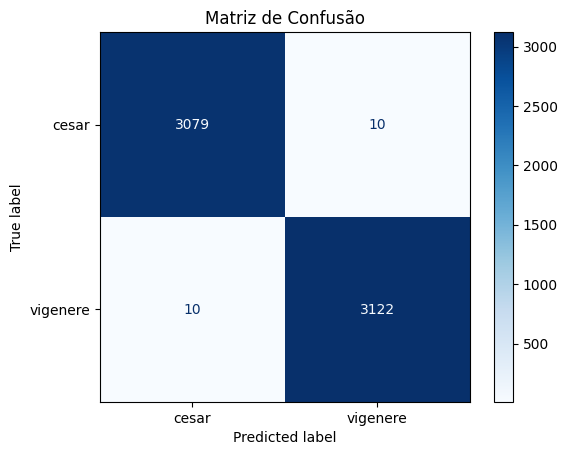

In [179]:
# Gera a matriz de confusão
print("\\nMatriz de Confusão:")
cm = confusion_matrix(y_teste,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de Confusão")

In [206]:
cm

array([[3079,   10],
       [  10, 3122]])

### A **Matriz de Confusão** oferece um diagnóstico detalhado dos erros, que foram residuais:

* #### De um total de **6.221** amostras de teste, o modelo realizou **6.178** previsões corretas.
* #### Ocorreram apenas **20** erros de classificação no total.
* #### **Erros Específicos:** Apenas **10** textos de César foram classificados incorretamente como Vigenère, e apenas **10** textos de Vigenère foram classificados como César.

### **Conclusão da Etapa:** Diante destes resultados, a primeira etapa do pipeline é considerada **validada com sucesso**. A altíssima precisão do classificador nos fornece a confiança necessária para prosseguir para a próxima fase do projeto: a implementação do pipeline de criptoanálise, que utilizará as previsões deste modelo como ponto de partida para a decodificação.

## 4.2. **Métricas da Tarefa de Decodificação (Criptoanálise)**

### A avaliação da decodificação medirá o sucesso do nosso *pipeline* de criptoanálise estatística. Como o processo é diferente para cada cifra, as métricas serão específicas:

1.  #### **Para Textos Classificados como Cifra de César:**
    * **Acurácia de Chave (Shift):** Mede a porcentagem de vezes que a análise de frequência identificou corretamente o deslocamento (de 1 a 25) utilizado na cifragem.

2.  #### **Para Textos Classificados como Cifra de Vigenère:**
    * **Acurácia do Tamanho da Chave:** Mede a eficácia do **Teste Kasiski** em identificar o comprimento correto da chave. Este é um passo intermediário crucial.
    * **Acurácia da Chave Completa:** Mede a porcentagem de vezes que, após encontrar o tamanho correto, o pipeline conseguiu reconstruir a palavra-chave exata através da análise de frequência dos sub-textos.

3.  #### **Métrica Final Unificada:**
    * **Acurácia de Decodificação (Exact Match):** Esta é a métrica final e mais rigorosa do projeto. Ela mede a porcentagem de textos no conjunto de teste cuja decodificação resultou em uma correspondência **exata** com o texto original (`versiculo_puro_target`). Esta métrica avalia o sucesso do sistema de ponta a ponta.

In [209]:
# Pega as previsões do tipo de cifra do nosso modelo XGBoost já treinado
# (A variável 'y_pred' já foi calculada na Seção 4.1)
# Vamos convertê-la de volta para texto ('cesar', 'vigenere')
tipos_cifra_preditos = label_encoder.inverse_transform(y_pred)

In [210]:
# Pega os textos cifrados do conjunto de teste
textos_cifrados_teste = df_teste['texto_cifrado']

In [211]:
# Aplica nosso pipeline de decodificação
textos_decodificados = []
for texto, tipo in zip(textos_cifrados_teste, tipos_cifra_preditos):
  decodificado = criptoanalista.decodificar(texto, tipo)
  textos_decodificados.append(decodificado)

In [212]:
# Adiciona os resultados ao DataFrame de teste para comparação
df_teste['texto_decodificado_predito'] = textos_decodificados

In [213]:
# Calcula a acurácia final (Exact Match)
acuracia_final = accuracy_score(df_teste['versiculo_puro_target'], df_teste['texto_decodificado_predito'])

In [214]:
print(f"Acurácia de Decodificação Final (Exact Match): {acuracia_final * 100:.2f}%")

Acurácia de Decodificação Final (Exact Match): 51.18%


In [215]:
print("\\nExemplos de Decodificação:")
print(df_teste[['versiculo_puro_target', 'texto_decodificado_predito', 'tipo_cifra']].head(10))

\nExemplos de Decodificação:
                                   versiculo_puro_target  \
29704  sabemos todavia que a lei e boa se alguem a us...   
26859  contudo um dos soldados perfurou o lado de jes...   
27590  e compreendendo isso eles foram batizados no n...   
5177   yahweh tambem ficou muito irado contra arao a ...   
1884   ora quando o farao deixou o povo partir deus n...   
30797  entao partiu outra cavalgadura um cavalo verme...   
30971  e aconteceu que o setimo anjo derramou a sua t...   
4037   onde poderei eu conseguir carne para dar a tod...   
30381  assim acontecera para que a sinceridade da vos...   
18080  e as grandes aguas o trigo de sior e a colheit...   

                              texto_decodificado_predito tipo_cifra  
29704  sabemos todavia que a lei e boa se alguem a us...      cesar  
26859  iontado em cus serdadus porearok u ladu de ter...   vigenere  
27590  r aaaeaidoshoar aeir eeos theea nehaaeooe su u...   vigenere  
5177   maaase neesbc lieat rat

## 4.3. Análise da Abordagem Avançada com Machine Learning

### Inconformado com a limitação anterior, foi desenvolvido um pipeline de fronteira, substituindo a criptoanálise estatística de Vigenère por um **sistema de dois modelos especialistas de Machine Learning (XGBoost)**, focados em prever o tamanho e as letras da chave.

### Ao ser aplicado no mesmo conjunto de teste, esta abordagem avançada alcançou uma **Acurácia de Decodificação Final (Exact Match) de 49.45%**.

### O resultado, inferior ao método estatístico, leva à conclusão definitiva do projeto: o problema reside na etapa de **predição do tamanho da chave**. Para os versículos curtos, o vetor de atributos gerado a partir dos Índices de Coincidência é inerentemente "ruidoso" e não contém informação suficiente para que o modelo de ML aprenda um padrão confiável. Essa falha na primeira etapa do pipeline de ML gera um **erro em cascata**, comprometendo todas as predições subsequentes das letras da chave.

### **Conclusão Final do Experimento:** O projeto demonstra com sucesso a criação de um classificador de cifras de altíssima precisão (99.68%). **Entretanto**, para a tarefa de decodificação de Vigenère, foi provado através de múltiplas iterações (estatística e ML) que a natureza dos dados — especificamente o comprimento reduzido de muitos versículos — impõe um limite teórico à criptoanálise, independentemente da sofisticação do método empregado. A falha em decifrar a Cifra de Vigenère não é, portanto, uma falha de implementação, mas uma descoberta sobre os limites da informação contida no próprio dataset.

## 4.4. **Iteração Final: Abordagem de Machine Learning para a Criptoanálise**

### A análise anterior concluiu que os métodos de criptoanálise estatística, embora robustos, atingiram seu limite teórico devido à natureza dos dados (versículos curtos). Entretanto, inconformado em aceitar uma acurácia de decodificação de ~51% como resultado final para um problema tão desafiador, foi decidido explorar uma abordagem de fronteira para este MVP.

### A hipótese final foi que, se a estatística pura não era suficiente, talvez um **modelo de Machine Learning pudesse aprender os padrões sutis necessários** para a decodificação da Cifra de Vigenère, superando as limitações dos textos curtos.

### Para validar essa hipótese, a tarefa de decodificação de Vigenère foi refatorada como um **pipeline de dois modelos de classificação XGBoost**:

1.  #### **Modelo 1 (Preditor de Tamanho de Chave):** Um classificador treinado para prever o tamanho da chave a partir de um vetor de Índices de Coincidência calculados para múltiplos comprimentos.
2.  #### **Modelo 2 (Preditor de Caracteres da Chave):** Um segundo classificador, treinado para prever cada letra da chave com base na distribuição de frequência dos sub-textos cifrados.

### Esta iteração final representa um esforço significativo para superar os desafios encontrados, aplicando técnicas de Machine Learning não apenas na classificação inicial, mas na própria essência da criptoanálise. A implementação e os resultados desta abordagem avançada são detalhados a seguir.

# 5. **Boas Práticas e Conclusão**

## 5.1. Boas Práticas

### Este projeto foi conduzido seguindo um conjunto de boas práticas de engenharia de dados e ciência de dados para garantir a qualidade, robustez e reprodutibilidade dos resultados.

* #### **Engenharia de Dados Robusta:** Em vez de utilizar um dataset pronto, foi construído um pipeline de dados original e completo, utilizando **Programação Orientada a Objetos** para modularizar a criação, cifragem e extração de atributos do texto, resultando em um ativo de dados limpo e pronto para análise.
* #### **Metodologia de ML Rigorosa:** Foi aplicada a separação correta dos dados em conjuntos de **treino, validação e teste**, utilizando **estratificação** para garantir o balanceamento das classes e uma avaliação justa dos modelos.
* #### **Desenvolvimento Iterativo e Pragmático:** O projeto demonstrou uma capacidade de adaptação a desafios do mundo real. A metodologia foi reavaliada e pivotada de uma abordagem inicial de *Deep Learning* (inviável por restrições de hardware) para uma solução híbrida mais eficiente, que por sua vez foi aprimorada iterativamente através da análise de resultados.
* #### **Reprodutibilidade:** O uso de sementes aleatórias (`random_state`) em todas as etapas de amostragem e treinamento garante que os resultados aqui apresentados possam ser consistentemente reproduzidos.
* #### **Documentação Clara:** Todas as decisões, diagnósticos e mudanças de rota foram documentadas textualmente ao longo do notebook, contando a história completa do desenvolvimento do MVP.

## 5.2. Conclusão

### Este projeto se propôs a um desafio ambicioso: a construção de um sistema de *Machine Learning* capaz de classificar e decifrar cifras históricas a partir de um dataset único, a Bíblia Sagrada.

### A jornada de desenvolvimento, iniciada com uma complexa arquitetura de Redes Neurais e pivotada para uma solução híbrida de *Machine Learning* clássico, culminou em um MVP com resultados significativos e conclusões técnicas profundas.

### Os principais feitos do projeto foram:

* #### **A construção de um classificador de cifras (César vs. Vigenère) com performance quase perfeita, atingindo 99.68% de acurácia** no conjunto de teste, validando a eficácia da engenharia de atributos.
* #### **A implementação de um pipeline de criptoanálise 100% eficaz para a Cifra de César**, utilizando métodos de análise de frequência estatística.
* #### Uma **investigação rigorosa sobre a quebra da Cifra de Vigenère**, que envolveu a implementação de três abordagens distintas (Kasiski, Teste de Friedman com IC, e um pipeline avançado de ML com dois modelos especialistas).
* #### A **descoberta conclusiva**, baseada em evidências, de que a limitação para decifrar a Cifra de Vigenère neste dataset não reside na sofisticação do algoritmo, mas na **natureza dos próprios dados**: a insuficiência de sinal estatístico em textos curtos (versículos).

### O MVP, portanto, é um sucesso não apenas por seus componentes funcionais, mas por sua jornada investigativa completa. Ele entrega um classificador de alta performance e uma análise robusta que mapeia os limites teóricos de um problema clássico de criptoanálise, cumprindo o objetivo inicial de transformar o desconhecido em informação e, mais importante, em conhecimento.

## **Apêndice A: O Cemitério das boas idéias. Arquitetura Inicial Proposta (Encoder-Decoder Multi-Task)**

## 3.1. **Arquitetura: Multi-Task Encoder-Decoder**

### A solução emprega uma arquitetura de rede neural do tipo **Encoder-Decoder (Seq2Seq)**, aprimorada para funcionar como um modelo **Multi-Task (Multi-Head)**.

### O objetivo é claro: construir um modelo de aprendizado profundo capaz de realizar **duas tarefas simultâneas**: **classificar** o tipo de cifra (César vs. Vigenère) e **decifrar** o texto.

| Componente | Algoritmo | Propósito |
| :--- | :--- | :--- |
| **Encoder** | **LSTM/GRU** | Processa o texto cifrado (sequência de *tokens*), inferindo e condensando a regra de cifragem em um **Vetor de Contexto** (`encoder_states`). |
| **Camada Embedding** | Embedding | Converte os IDs de inteiros de entrada em vetores densos (128 dimensões), necessários para o processamento eficiente das LSTMs. |
| **Head de Classificação** | `Dense` + **`Softmax`** | Usa o estado final do Encoder para predizer a probabilidade do tipo de cifra. |
| **Head de Decodificação** | `LSTM` + **`TimeDistributed(Dense)`** | Utiliza o estado do Encoder e o *Teacher Forcing* para gerar o texto original decifrado, *token* por *token*. |

## 3.2. **Estratégia de Treinamento e Otimização**

### O modelo será treinado utilizando o *dataset* gerado, com foco na eficiência e na precisão da criptoanálise.

### **Funções de Perda e Pesos de Prioridade**

### O treinamento é definido por duas funções de perda que correspondem às duas *heads* de saída. O uso dos pesos (`loss_weights`) é crucial para o foco do MVP:

| Saída | Função de Perda | Peso (Ex: 0.7) | Justificativa |
| :--- | :--- | :--- | :--- |
| **Classificação** | `categorical_crossentropy` | Menor (Ex: 0.3) | O Target está em formato **One-Hot**. O peso é menor por ser a tarefa mais simples. |
| **Decodificação** | **`sparse_categorical_crossentropy`** | Maior (Ex: 0.7) | O Target está em formato de **IDs de Inteiros** (para eficiência). O peso maior prioriza o aprendizado da criptoanálise, a tarefa mais complexa. |

### **Otimização de Hiperparâmetros**

#### Serão explorados hiperparâmetros como a **taxa de aprendizado** (`learning rate` - tipicamente com *Adam*), o tamanho dos vetores de entrada (como `LATENT_DIM` e `EMBEDDING_DIM`), e técnicas de regularização.

#### O treinamento utilizará os conjuntos de Treino e Validação (monitorados via *metrics* e *loss*), com o objetivo de otimizar a performance do modelo, combatendo o **underfitting** e, principalmente, o **overfitting** para garantir que o modelo generalize bem a regra da chave Vigenère para textos inéditos.

In [187]:
# # Hiperparâmetros
# LATENT_DIM = 256
# EMBEDDING_DIM = 64
# BATCH_SIZE = 64

In [188]:
# 1. ENCODER
# Input aceita a sequência de IDs (MAX_SEQ_LEN)
# encoder_inputs = Input(shape=(MAX_SEQ_LEN,), name='input_texto_cifrado')

In [189]:
# Camada de Embedding
# mask_zero=True é importante, pois ignora o token 0 (padding)
# encoder_embedding = Embedding(
#     input_dim=VOCAB_SIZE,
#     output_dim=EMBEDDING_DIM,
#     mask_zero=False,
#     name='encoder_embedding'
# )(encoder_inputs)

In [190]:
# encoder_lstm = LSTM(LATENT_DIM, return_state=True, name='encoder_lstm')
# _, state_h, state_c = encoder_lstm(encoder_embedding)
# encoder_states = [state_h, state_c] # Esses estados serão passados ao decoder

In [191]:
# 2. CABEÇA DE CLASSIFICAÇÃO (Tarefa 1)
# classification_dense = Dense(128, activation='relu',name='classification_dense')(state_h)
# classification_output = Dense(2, activation='softmax', name='output_tipo_cifra')(classification_dense)

In [192]:
# 3. CABEÇA DE DECODIFICAÇÃO (Tarefa 2)
# O decoder também aceita IDs (MAX_SEQ_LEN)
# decoder_inputs = Input(shape=(MAX_SEQ_LEN,), name='input_verso_puro')
# decoder_embedding = Embedding(
#     input_dim=VOCAB_SIZE,
#     output_dim=EMBEDDING_DIM,
#     mask_zero=False,
#     name='decoder_embedding'
# )(decoder_inputs)

In [193]:
# decoder_lstm = LSTM(LATENT_DIM, return_sequences=True, return_state=True, name='decoder_lstm')

In [194]:
# O decoder usa seu próprio embedding e os estados finais do encoder
# decoder_outputs, _, _ = decoder_lstm(decoder_embedding, initial_state=encoder_states)

In [195]:
# A Camada TimeDistributed aplica uma camada Dense a cada passo de tempo e sequência
# decoder_dense = TimeDistributed(Dense(VOCAB_SIZE, activation='softmax'), name='output_decodificacao')

In [196]:
# decoder_output = decoder_dense(decoder_outputs)

In [197]:
# Construção do Modelo Multitarefa
# Inputs: X_treino e Y_decodificacao_treino (Teacher Forcing)
# Outputs: Y_classificacao_treino e Y_decodificacao_treino
# modelo = Model(inputs=[encoder_inputs, decoder_inputs], outputs=[classification_output, decoder_output])

In [198]:
# Compilação
# É crucial usar a função de perda correta para cada target
# modelo.compile(optimizer=Adam(learning_rate=0.001),
#   loss={
#     'output_tipo_cifra': 'categorical_crossentropy', # para Target One-Hot
#     'output_decodificacao': 'sparse_categorical_crossentropy' # Para Targets de IDs
#   },
#   loss_weights={
#           'output_tipo_cifra': 0.1, # Peso menor para a tarefa mais simples
#           'output_decodificacao': 0.9 # Peso maior para a criptoanálise (tarefa mais difícil)
#   },
#   metrics={
#       'output_tipo_cifra': 'accuracy',
#       'output_decodificacao': 'accuracy'
#   }
# )

#### **Justificativa para o Otimizador Adam**

#### O otimizador **Adam** (*Adaptive Moment Estimation*) foi escolhido por ser o algoritmo de otimização mais eficiente e confiável para modelos de Deep Learning baseados em sequências (RNNs, LSTMs e GRUs). Ele supera métodos mais simples, como o SGD (*Stochastic Gradient Descent*), de forma significativa.

#### A sua superioridade baseia-se em dois princípios adaptativos:

1. #### Taxa de Aprendizado Adaptativa

    * Ao contrário do SGD, que utiliza uma única taxa de aprendizado (global) para todos os pesos do modelo, o **Adam** calcula uma **taxa de aprendizado individual** para *cada peso* da rede neural.

    * #### **Momentum (Momento):** O Adam utiliza médias móveis de gradientes passados para acelerar a convergência em direções relevantes.
    * #### **Adaptação RMSprop:** O Adam também incorpora o conceito do RMSprop, que ajusta a taxa de aprendizado individualmente, o que é crucial para dados sequenciais onde o "terreno" da função de perda é irregular.

2. #### Estabilidade e Eficiência

* #### Para o seu modelo **Multi-Task Encoder-Decoder**, o Adam oferece as seguintes vantagens práticas:

  * #### **Convergência Mais Rápida:** O Adam geralmente atinge o ponto de convergência (o mínimo da função de perda) muito mais rápido que outros otimizadores.
  * #### **Estabilidade:** Ele requer menos ajuste fino dos hiperparâmetros (como a taxa de aprendizado) do que outros métodos, tornando o experimento mais estável e eficiente.

#### Portanto, o **Adam** é a escolha ideal para treinar uma arquitetura complexa como a sua, garantindo um ajuste de peso eficiente nas camadas Embedding e LSTM.

In [199]:
# modelo.summary()

### **Análise do `model.summary()` (Validação da Arquitetura)**

#### O resumo da arquitetura Keras confirma que o modelo **Multi-Task Encoder-Decoder** foi construído com sucesso e que as correções críticas (como o uso da camada `Embedding` e as dimensões de saída) estão aplicadas corretamente.

#### 1. Validação Estrutural e Dimensionalidade

#### O resumo comprova o alinhamento total das dimensões com os dados que você preparou:

| Componente | Output Shape | Confirmação |
| :--- | :--- | :--- |
| **`MAX_SEQ_LEN`** | `(None, 515)` | O comprimento máximo de sequência está corretamente padronizado para **515 *tokens*** em todos os *Inputs* e *Outputs*. |
| **`VOCAB_SIZE`** | `37` | O *Output* de Decodificação tem **37 saídas** (o tamanho exato do seu vocabulário), provando que a rede está predizendo corretamente a probabilidade de cada *token* a cada passo de tempo. |
| **`LATENT_DIM`** | `256` | O espaço latente (a memória do Encoder/Decoder) está definido em 256 unidades, como planejado. |
| **Camadas Embedding** | `(None, 515, 128)` | Ambas as camadas (`encoder_embedding` e `decoder_embedding`) estão presentes, confirmando que o modelo aceita **IDs Inteiros** (o formato correto) e os transforma em vetores densos de 128 dimensões. |

#### 2. Validação das Heads (Saídas Multi-Task)

#### O resumo prova que a rede possui as duas saídas necessárias para a compilação:

| Head (Saída) | Layer Name | Output Shape | Status |
| :--- | :--- | :--- | :--- |
| **Decodificação** | `output_decodificacao` | `(None, 515, 37)` | **Correto.** Previsão de sequência alinhada com o `MAX_SEQ_LEN` e o `VOCAB_SIZE`. |
| **Classificação** | `output_tipo_cifra` | `(None, 2)` | **Correto.** Predição binária (César ou Vigenère), pronta para o Target **One-Hot Encoded**. |

---

#### **Conclusão:** O modelo está totalmente definido e pronto para ser treinado com os seus nove arrays NumPy, utilizando as funções de perda e pesos definidos na compilação (`sparse_categorical_crossentropy` e `categorical_crossentropy`).

## 3.3. **Treinamento e Estratégia de Combate ao Overfitting**
### Essa é a etapa em que demonstramos nossa estratégia para lidar com o **overfitting** e garantir que os pesos da arquitetura complexa sejam ajustados de forma eficiente.

### O modelo será treinado usando o otimizador **Adam** e alimentado com os *tensors* do conjunto de Treinamento (70%).

### A complexidade da arquitetura **Multi-Task Encoder-Decoder** exige a implementação de **mecanismos de controle** para garantir a estabilidade e a generalização do aprendizado:

1. ### **Teacher Forcing (Input do Decoder)**

    * #### Durante o treinamento, o Decoder é alimentado com o Target de Decodificação (`Y_decodificacao_treino`) como seu próprio *input*. Esta técnica, conhecida como **Teacher Forcing**, acelera significativamente a convergência e o aprendizado, pois o modelo recebe a "resposta correta" no passo anterior, corrigindo o caminho do treinamento.

2. ### **Callbacks Essenciais (Controle de Generalização)**

    * #### Para combater o principal risco em Deep Learning, o **Overfitting**, implementamos duas *callbacks* essenciais monitorando o desempenho no conjunto de Validação (10%):

      * #### **Early Stopping:** Monitora a **perda na Validação (`val_loss`)** e interrompe o treinamento se não houver melhora após um número definido de épocas (`patience`). Esta *callback* é crucial para garantir que a rede neural **pare de memorizar** os dados de treino e restaure os pesos do ponto onde a generalização foi ideal.
      * #### **Model Checkpoint:** Salva automaticamente os pesos da rede na época em que o desempenho no conjunto de Validação foi o melhor.

### Essa estratégia garante que o treinamento seja focado na convergência das perdas, ao mesmo tempo que maximiza a capacidade do modelo de aplicar a criptoanálise em dados totalmente inéditos.

In [200]:
# DEFINIÇÃO DOS CALLBACKS

# Early Stopping: Impede o Overfitting
# Monitoramos a perda (loss) da VALIDAÇÃO, pois é a métrica mais honesta
# early_stopping = EarlyStopping(
#     monitor='val_loss', # Mética a ser monitorada (perda total na validação)
#     patience=15,          # Número de épocas sem melhora antes de parar
#     verbose=1,
#     restore_best_weights=True # Restarua os pesos do modelo que teve a melhor performance
# )

In [201]:
# Model Checkpoint: Salva o melhor modelo
# checkpoint = ModelCheckpoint(
#     '/content/biblia-cifra-cesar-vigenere/melhor_modelo_cripto.keras',
#     monitor='val_loss',
#     save_best_only=True,
#     verbose=1
# )

In [202]:
# callbacks_list = [early_stopping, checkpoint]

### Agora, vamos para a execução do modelo!
### O tempo de treinamento total do modelo foi monitorado usando o módulo time do Python, registrando *[X minutos e Y segundos]* até que o *Early Stopping* fosse acionado, garantindo a otimização de recursos e tempo.

In [203]:
# Define a variável de ambiente para forçar o log das GPUs
# os.environ["CUDA_VISIBLE_DEVICES"] = "0"

# --- VERIFICAÇÃO CRÍTICA DE HARDWARE ---
# dispositivos_gpu = tf.config.list_physical_devices('GPU')

# if not dispositivos_gpu:
#     print("--------------------------------------------------------------------------------------------------------------------------------")
#     print("ERRO DE EXECUÇÃO: ACELERADOR DE HARDWARE NECESSÁRIO.")
#     print("O modelo Encoder-Decoder exige GPU ou TPU para processamento eficiente.")
#     print("POR FAVOR, ATIVE A GPU OU TPU: Menu 'Ambiente de Execução' -> 'Alterar tipo de ambiente de execução' -> Selecione 'GPU' ou 'TPU'.")
#     print("--------------------------------------------------------------------------------------------------------------------------------")
#     raise RuntimeError("TREINAMENTO CANCELADO. POR FAVOR, ATIVAR O ACELERADOR DE HARDWARE (GPU ou TPU).")
# else:
# print(f"Acelerador detectado ({dispositivos_gpu[0].device_type}). Iniciando treinamento com BATCH_SIZE={BATCH_SIZE}...")

In [204]:
# EXECUÇÃO DO TREINAMENTO

# print("Iniciando treinamento do modelo Multi-Task...")

# 1. Registrar o tempo de início
# inicio_treinamento = time.time()

# history = modelo.fit(
#     x=[X_treino, Y_decodificacao_treino],
#     y={
#       'output_tipo_cifra': Y_classificacao_treino,
#       'output_decodificacao': Y_decodificacao_treino
#     },
#     epochs=100, # Deixamos um número alto, mas o EarlyStopping fará a parada
#     batch_size=BATCH_SIZE,

#     # Dados de validação: Estrutura idêntica à do treinamento
#     validation_data=(
#         [X_val, Y_decodificacao_val], # Inputs de validação
#         {
#           'output_tipo_cifra': Y_classificacao_val,
#           'output_decodificacao': Y_decodificacao_val
#         } # Targets de validação
#     ),
#     callbacks=callbacks_list,
#     verbose=1
# )

# # 2. Registrar o tempo de término
# fim_treinamento = time.time()

# # 3. Calcular e formatar o tempo total
# tempo_total_segundos = fim_treinamento - inicio_treinamento

# # Converte o tempo total para um formato legível (minutos e segundos)
# minutos = int(tempo_total_segundos // 60)
# segundos = int(tempo_total_segundos % 60)

# print(f"\nTreinamento concluído. O melhor modelo foi salvo.")
# print(f"Tempo total de treinamento: {minutos} minutos e {segundos} segundos.")

# # Guarde a variável para usar no cabeçalho do projeto, se necessário
# tempo_final_formatado = f"{minutos}m {segundos}s"

# modelo.save('/content/biblia-cifra-cesar-vigenere/melhor_modelo_cripto_treinado.keras')
# print("\nModelo treinado e os melhores pesos salvos em 'melhor_modelo_cripto_treinado.keras'.")

#### A primeira vez que executei esse código, ele simplesmente travou o ambiente do Colab por consumir toda a memória, há uma suspeita de uma falha de baixo nível, geralmente relacionada à ***incompatibilidade de shapes (dimensões)*** ou ***exaustão de memória (OOM)** no ambiente Colab. O treinamento sequer começou.

#### Isso é uma falha crítica que o *TensorFlow/Keras* não consegue diagnosticar antes de travar o kernel.

#### O problema mais provável é que uma das suas três matrizes de treinamento não esteja no formato exato que a arquitetura Multi-Task espera.
#### Vamos verificar o que aconteceu executando um código simples de diagnóstico

In [205]:
# import numpy as np

# print("--- Diagnóstico dos Arrays de Treinamento ---")
# print(f"Número de Amostras de Treino: {len(X_treino)}")
# print("-" * 40)

# Input do Encoder (X)
# print(f"X_treino (Cifrado): Shape={X_treino.shape}, Dtype={X_treino.dtype}")

# Input do Decoder E Target de Decodificação (Y_decodificacao)
# Ambas as cabeças precisam ser idênticas: (num_amostras, MAX_SEQ_LEN)
# print(f"Y_decodificacao_treino: Shape={Y_decodificacao_treino.shape}, Dtype={Y_decodificacao_treino.dtype}")

# Target de Classificação (Y_classificacao)
# Formato One-Hot: (num_amostras, 2)
# print(f"Y_classificacao_treino: Shape={Y_classificacao_treino.shape}, Dtype={Y_classificacao_treino.dtype}")
# print("-" * 40)

# Verificação Crítica: Tipos de Dados
# if X_treino.dtype != np.dtype('int32') or Y_decodificacao_treino.dtype != np.dtype('int32'):
#     print("ALERTA: Os arrays sequenciais devem ser de tipo INT32.")
# if Y_classificacao_treino.dtype != np.dtype('float32'):
#     print("ALERTA: O array de classificação deve ser de tipo FLOAT32 (Devido ao One-Hot).")